### ======================================================
### Assignment
### ======================================================

##### Name: Akshay Kochhar
##### Email: akshay.college2018@gmail.com
##### Created: 3rd Jan, 2021

##### ===========================================================================
##### Q1. Predict the product tier from the information given in the other columns
##### ===========================================================================

In [1]:
#==============================================================================
# Import Required Packages
#==============================================================================
import os
import numpy as np                # To perform numerical operations
import pandas as pd               # To work with dataframes
import seaborn as sns             # To visualize data
%matplotlib qt                    
import string                     # To work with string 
import re                         # to perform regular expression operations


# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#==============================================================================
# Setting Dimensions of plots
#==============================================================================
sns.set(rc={'figure.figsize':(11.7,8.27)})

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
#==============================================================================
# Importing Data 
#==============================================================================

# Set Base Path
base_path = 'C:/Users/aksha/Desktop/Junir_DS/Junior_Data_Scientist_Akshay_Kochhar/'
file_name = 'AS24_Case_Study_Data.csv'
    
# Set Directory
# os.chdir(base_path)      # Use to change the current working directory

data_org = pd.read_csv(base_path+file_name)

# Creating a copy of original data
data_copy = data_org.copy()

# To check how the date looks
data_copy.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.0378033
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.067925678
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.081613797
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008621
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.040816327


#### ==============================================================================
#### **Exploratory data analysis:**
#### ==============================================================================

Some of the steps performed in data analysis are as follows:
<ol>
<li>Getting to know the data.</li>
<li>Data Preprocessing (Missing values).</li>
<li>Check unique values.</li>
<li>Check duplicate values.</li>
</ol>

In [5]:
#==============================================================================
# Getting to know the data
#==============================================================================

# To check variables' data type
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB
None


From below table we can check following things:
<ol>
<li>Seven columns are of type float/int and five columns are of type object.</li>
<li>There are missing values in column 'search_views', 'detail_views' and 'ctr'</li>
<li>Column 'ctr' would have values in incorrect format too, that is why the format is object type,but it has to be of float data type.</li>
</ol>

In [6]:
#==============================================================================
# Check for missing values
#==============================================================================

data_copy.isnull()

print('Data columns with null values:\n \n', data_copy.isnull().sum())
# There are missing values in 3 columns.

Data columns with null values:
 
 article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64


In [7]:
# Summary of numerical variables
summary_num = data_copy.describe()
print(summary_num)

         article_id          price  first_zip_digit  first_registration_year  \
count  7.832100e+04   78321.000000     78321.000000             78321.000000   
mean   3.574869e+08   15067.655316         4.632117              2011.089465   
std    5.076572e+06   16374.497606         2.354275                 6.538395   
min    3.472324e+08       1.000000         1.000000              1924.000000   
25%    3.536387e+08    5750.000000         3.000000              2008.000000   
50%    3.585480e+08   10900.000000         5.000000              2013.000000   
75%    3.614817e+08   18890.000000         7.000000              2015.000000   
max    3.647040e+08  249888.000000         9.000000              2106.000000   

        search_views  detail_views    stock_days  
count   78311.000000  78311.000000  78321.000000  
mean     2297.502522     93.469870     35.986262  
std      6339.034423    228.025588     32.214835  
min         0.000000      0.000000     -3.000000  
25%       367.000000    

Following points were observed from numerical variable summary:
<ol>
<li>There are outliners in column "Price","search_views","detail_views" and "stock_days", as all of them are right skewed. (mean > median)</li>
<li>The price cannot be 1, and stock_days cannot be -ve value.</li>
<li>The first_registration_year can not be in future (2106) or value above 2020. Therefore, I have to check the presence of outliners.</li>
</ol>

In [8]:
# Summary of categorical variables
summary_cate = data_copy.describe(include = "O")
print(summary_cate)

       product_tier   make_name created_date deleted_date    ctr
count         78321       78321        78321        78321  78297
unique            3          91           35          273  46925
top           Basic  Volkswagen     16.11.18     01.12.18      0
freq          75421        9430         3442          947   1244


Following points were observed from categorical variable summary:
<ol>
<li> The categorical variable 'product_tier' and "make_name" seems ohkey, but I have to check for the presence of special characters. </li>
<li> The variable 'created_date' and 'deleted_date' need to be formatted in date format, and ctr in float datatype. Therefore, I have to check the presence of special characters.</li>
</ol>

In [9]:
#==============================================================================
# Cleaning and formatting all data column 
#==============================================================================

# visualise and cleaning article_id data
#print(data_copy['article_id'].shape)
#demogrphic_data.head()
#print(data_copy['article_id'].describe())

#Check and Correct article_id Column
data_copy['article_id'].value_counts()

359772384    2
360768628    2
360768627    2
364638423    2
350214315    2
            ..
364332290    1
359232772    1
358552840    1
358548746    1
348782592    1
Name: article_id, Length: 78305, dtype: int64

There are some duplicate article_ids becuase there are 78305 unique values out of 78321 total values which accounts to **0.02%** of total values.

Further, we have to investigate if the articles id's have same data or different values.

In [10]:
#==============================================================================
#==============================================================================

#Check Duplicated Values in article_id column
duplicte_article_ID = data_copy[data_copy['article_id'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
duplicte_article_ID_lst = [var for var in duplicte_article_ID['article_id']]

# print the duplicate rows to analyse
# for var in duplicte_article_ID_lst:
#     print(data_copy[data_copy['article_id'] == var]) 
#     print(" ")
    
# Removing Duplicate Records
data_copy.drop_duplicates(subset ="article_id",keep = 'first', inplace = True)
print(data_copy.shape)
#16 Duplicate Records dropped

# We can leave other columns for checking duplicate values as they are continuous variables

#==============================================================================
#==============================================================================

(78305, 12)


In [12]:
### visualise and cleaning product_tier data
# print(data_copy['product_tier'].shape)
# print(data_copy['product_tier'].describe())

### Check and Correct product_tier Column
# data_copy['product_tier'].unique()

### product_tier data seems to be correct

#==============================================================================
#==============================================================================

### visualise and cleaning make_name data
# print(data_copy['make_name'].shape)
# print(data_copy['make_name'].describe())

### Check and Correct make_name Column
# data_copy['make_name'] = data_copy['make_name'].str.capitalize()
# data_copy['make_name'].unique()

### make_name data seems to be correct

#==============================================================================
#==============================================================================

### visualise and cleaning created_date data
# print(data_copy['created_date'].shape)
# print(data_copy['created_date'].describe())

### Check and Correct created_date Column
# data_copy['created_date'].unique()

### created_date data seems to be correct 

#==============================================================================
#==============================================================================

### visualise and cleaning deleted_date data
# print(data_copy['deleted_date'].shape)
# print(data_copy['deleted_date'].describe())

### Check and Correct deleted_date Column
# data_copy['deleted_date'].unique()

### deleted_date data seems to be correct 

#==============================================================================
#==============================================================================

### visualise and cleaning ctr data
# print(data_copy['ctr'].shape)
# print(data_copy['ctr'].describe())
#data_copy['ctr'].tail()

### Check and Correct ctr Column
# data_copy['ctr'].unique()
# data_copy['ctr'] = data_copy['ctr'].astype(float) 

### Why converting from object to float, I got to knot that there are values in the form '27.624.309.392.265.100' 
### and '01. April' which is causing trouble

### print the values which are incorrect in 'ctr' column
val_list = []
for var in data_copy['ctr']:
    if (len(str(var))>12 or re.search(r"[a-zA-z]+",str(var))):
        val_list.append(var)

print(val_list)

### Removing the values in incorrect format and replacing them with a flag (9.9999999999)
for var in val_list:
    data_copy['ctr'] = data_copy['ctr'].str.replace(str(var),'9.9999999999')
    

### Changing the format of ctr column
data_copy['ctr'] = data_copy['ctr'].astype(float)

#==============================================================================
#==============================================================================

['27.624.309.392.265.100', '4.086.021.505.376.340', '30.066.815.144.766.100', '5.126.118.795.768.910', '1.485.148.514.851.480', '49.729.729.729.729.700', '3.561.643.835.616.430', nan, '19.169.329.073.482.400', '43.058.350.100.603.600', '16.423.082.718.095.500', nan, '17.298.937.784.522.000', '23.692.810.457.516.300', '18.787.878.787.878.700', '25.096.525.096.525.000', '21.399.456.521.739.100', '16.666.666.666.666.600', '29.850.746.268.656.700', '5.551.948.051.948.050', '41.534.988.713.318.200', '11.155.913.978.494.600', nan, '2.287.390.029.325.510', nan, '10.317.460.317.460.300', '3.834.416.223.666.070', '22.727.272.727.272.700', '5.369.565.217.391.300', nan, '9.677.419.354.838.700', '57.017.543.859.649.100', nan, '2.608.503.100.088.570', nan, '2.271.006.813.020.430', '5.202.312.138.728.320', '52.424.545.844.657.400', '2.867.570.385.818.560', '5.101.851.851.851.850', '5.429.417.571.569.590', '11.794.500.723.589.000', '18.333.333.333.333.300', '3.078.556.263.269.630', '13.796.849.538.29

In [13]:
### formatting first_registration_year data

data_copy['first_registration_year_dt'] = pd.to_datetime(data_copy.first_registration_year,errors='coerce',yearfirst=True,format='%Y')

data_copy['first_registration_year_dt_yr'] = data_copy['first_registration_year_dt'].dt.year

#==============================================================================
#==============================================================================

### formatting created_date data

data_copy['created_date_dt'] = pd.to_datetime(data_copy.created_date,errors='coerce',dayfirst=True)

#==============================================================================
#==============================================================================

### formatting deleted_date data

data_copy['deleted_date_dt'] = pd.to_datetime(data_copy.deleted_date,errors='coerce',dayfirst=True)

#==============================================================================
#==============================================================================

### Calculate Stock Days from created_date and deleted_date

data_copy['stock_days_dt'] = data_copy['deleted_date_dt'] - data_copy['created_date_dt']

#==============================================================================
#==============================================================================

### Checking value for ctr if I create another column division of given columns
data_copy['ctr_calc'] = (data_copy['detail_views']/data_copy['search_views'])

data_copy.head()


,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,first_registration_year_dt,first_registration_year_dt_yr,created_date_dt,deleted_date_dt,stock_days_dt,ctr_calc
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.037803,2013-01-01,2013,2018-07-24,2018-08-24,31 days,0.039793
1,354412280,Basic,Mercedes-benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.067926,2015-01-01,2015,2018-08-16,2018-10-07,52 days,0.067926
2,349572992,Basic,Mercedes-benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.081614,1998-01-01,1998,2018-07-16,2018-09-05,51 days,0.081614
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014009,2003-01-01,2003,2018-07-20,2018-10-29,101 days,0.014009
4,355688985,Basic,Mercedes-benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.040816,2014-01-01,2014,2018-08-28,2018-09-08,11 days,0.040816


In [14]:
### Chekcing information related to data for further processing
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78305 entries, 0 to 78320
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   article_id                     78305 non-null  int64          
 1   product_tier                   78305 non-null  object         
 2   make_name                      78305 non-null  object         
 3   price                          78305 non-null  int64          
 4   first_zip_digit                78305 non-null  int64          
 5   first_registration_year        78305 non-null  int64          
 6   created_date                   78305 non-null  object         
 7   deleted_date                   78305 non-null  object         
 8   search_views                   78295 non-null  float64        
 9   detail_views                   78295 non-null  float64        
 10  stock_days                     78305 non-null  int64          
 11  ct

In [15]:
#==============================================================================
# Generally checking missing values in formatted columns
#==============================================================================

### Check for missing values
data_copy.isnull()

print('Data columns with null values:\n', data_copy.isnull().sum())
### There are missing values in 3 columns.

Data columns with null values:
 article_id                        0
product_tier                      0
make_name                         0
price                             0
first_zip_digit                   0
first_registration_year           0
created_date                      0
deleted_date                      0
search_views                     10
detail_views                     10
stock_days                        0
ctr                              24
first_registration_year_dt        0
first_registration_year_dt_yr     0
created_date_dt                   0
deleted_date_dt                   0
stock_days_dt                     0
ctr_calc                         24
dtype: int64


In [16]:
#==============================================================================
# Dropping columns which were not in correct format
#==============================================================================

data_copy_clean = data_copy.drop(['first_registration_year','created_date','deleted_date','ctr','stock_days'], axis=1)
data_copy_clean.head()

,article_id,product_tier,make_name,price,first_zip_digit,search_views,detail_views,first_registration_year_dt,first_registration_year_dt_yr,created_date_dt,deleted_date_dt,stock_days_dt,ctr_calc
0,350625839,Basic,Mitsubishi,16750,5,3091.0,123.0,2013-01-01,2013,2018-07-24,2018-08-24,31 days,0.039793
1,354412280,Basic,Mercedes-benz,35950,4,3283.0,223.0,2015-01-01,2015,2018-08-16,2018-10-07,52 days,0.067926
2,349572992,Basic,Mercedes-benz,11950,3,3247.0,265.0,1998-01-01,1998,2018-07-16,2018-09-05,51 days,0.081614
3,350266763,Basic,Ford,1750,6,1856.0,26.0,2003-01-01,2003,2018-07-20,2018-10-29,101 days,0.014009
4,355688985,Basic,Mercedes-benz,26500,3,490.0,20.0,2014-01-01,2014,2018-08-28,2018-09-08,11 days,0.040816


In [17]:
#==============================================================================
# Writing Complete Master Data to CSV
#==============================================================================

data_copy_clean.to_csv('1_Clean_Data.csv', encoding='utf-8', index=False)

In [18]:
#========================================================================================
# Missing values: Let's find out which variables of the dataset contain missing values
#========================================================================================

### Changing stock days from series to int
data_copy_clean['stock_days_dt_int'] = data_copy_clean['stock_days_dt'].dt.days

### make a list of the variables that contain missing values
vars_with_na = [var for var in data_copy_clean.columns if data_copy_clean[var].isnull().sum()>1 
                and var not in ['article_id','product_tier']]

### print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data_copy_clean[var].isnull().mean(), 6),  ' % missing values')

search_views 0.000128  % missing values
detail_views 0.000128  % missing values
ctr_calc 0.000306  % missing values


Our dataset contains a few variables with missing values. We need to account for this in following step, where we will engineer the variables for use in Machine Learning Models.

In [19]:
#========================================================================================
# Check zero values: Let's find out which variables of the dataset contain zero values
#========================================================================================

### make a list of the variables that contain zero values
vars_with_zero = [var for var in data_copy_clean.columns if data_copy_clean[var].isin([0]).sum()>1 
                  and var not in ['article_id','stock_days_dt_int','stock_days_dt']]

### print the variable name and the percentage of missing values
for var in vars_with_zero:
    print(var, np.round(data_copy_clean[var].isin([0]).mean(), 6),  ' % zero values')

search_views 0.000179  % zero values
detail_views 0.016065  % zero values
first_registration_year_dt 0.000332  % zero values
ctr_calc 0.015887  % zero values


Our dataset contains a few variables with zero values, i.e. search_views, detail_views, first_registraction_year_dt, ctr_calc. We need to account for this in following step, where we will engineer the variables for use in Machine Learning Models.

**Note:** We can use either Product_tier or detail_view as target variable in Exploratory Data Analysis (EDA). The purpose is too undertand the pattern in the data, and it can be understood from any of the variables. Therefore, for Q2, I have not shown EDA as this solves the pupose for both questions.

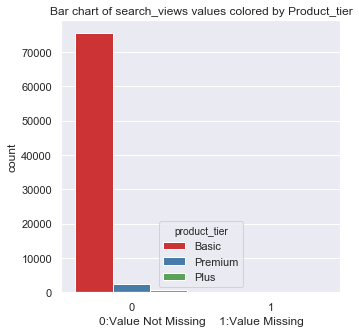

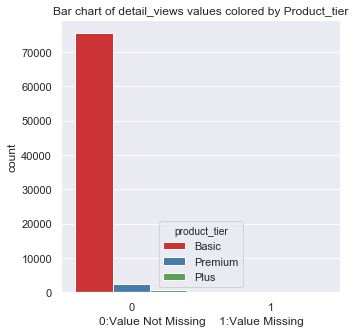

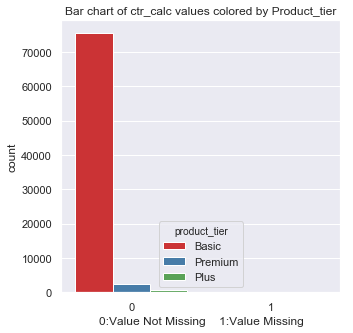

In [20]:
#========================================================================================
# Relationship between missing values and product_tier variable
#========================================================================================

### Let's evaluate count of Product_tier for those cases where the information is missing, for each variable.

def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation is missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the observations where the information is missing or present
    plt.figure(figsize=(5,5))
    sns.countplot(x=var,hue='product_tier',data=df,palette='Set1')
    plt.title("Bar chart of " +var+ " values colored by Product_tier", fontsize=12)
    plt.xlabel("0:Value Not Missing    1:Value Missing", fontsize=12)
    
for var in vars_with_na:
    analyse_na_value(data_copy_clean, var)

We can see that there are no significant count of missing values for search_views, detail_views, ctr_calc. The missing values will be captured once we engineer these values in the following stage.

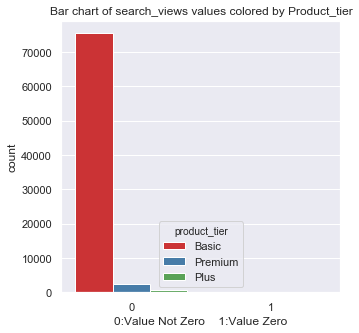

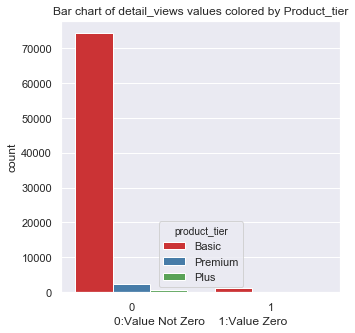

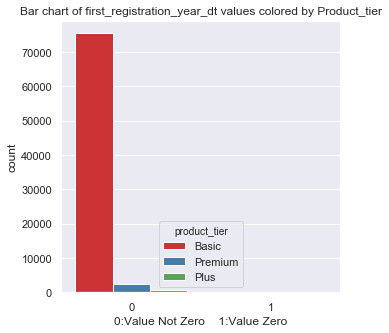

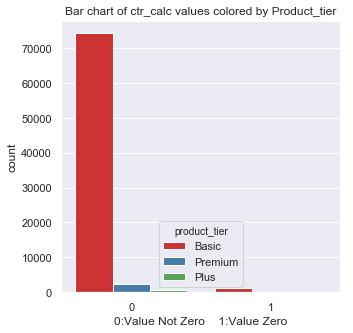

In [21]:
#========================================================================================
# Relationship between zero values and product_tier variable
#========================================================================================

### Let's evaluate count of Product_tier for those cases where the information is zero, for each variable.

def analyse_zro_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation is 0 or zero otherwise
    df[var] = np.where(df[var].isin([0]), 1, 0)
    
    # let's calculate the observations where the information is zero or otherwise
    plt.figure(figsize=(5,5))
    sns.countplot(x=var,hue='product_tier',data=df,palette='Set1')
    plt.title("Bar chart of " +var+ " values colored by Product_tier", fontsize=12)
    plt.xlabel("0:Value Not Zero    1:Value Zero", fontsize=12)
    
for var in vars_with_zero:
    analyse_zro_value(data_copy_clean, var)

From the above graph, we can leave stock_days_dt and ctr_calc. Apart from it, other columns do not contain significant amount of zero values. We will take care of it in the following Engineering step.

In [22]:
#========================================================================================
# Numerical variables
#========================================================================================

### Let's go ahead and find out numerical variables in the dataset

# list of numerical variables
num_vars = [var for var in data_copy_clean.columns if data_copy_clean[var].dtypes != 'O' and var not in ['first_registration_year_dt','first_registration_year_dt_yr','created_date_dt','deleted_date_dt','stock_days_dt']]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data_copy_clean[num_vars].head()

Number of numerical variables:  7


,article_id,price,first_zip_digit,search_views,detail_views,ctr_calc,stock_days_dt_int
0,350625839,16750,5,3091.0,123.0,0.039793,31
1,354412280,35950,4,3283.0,223.0,0.067926,52
2,349572992,11950,3,3247.0,265.0,0.081614,51
3,350266763,1750,6,1856.0,26.0,0.014009,101
4,355688985,26500,3,490.0,20.0,0.040816,11


There are 7 products in the dataset.

From the above view of the dataset, we notice the variable article_id, which is an indicator of the products. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each product in the dataset. See below

In [23]:
### Checking the count of values in article_id v/s total number of values in the dataset.
print('Number of Article Id labels: ', len(data_copy_clean.article_id.unique()))
print('Number of products in the Dataset: ', len(data_copy_clean))

Number of Article Id labels:  78305
Number of products in the Dataset:  78305


For 78305 observations, we have 78305 values that is one for each product. Therefore, we will remove this feature from the data.

In [24]:
#========================================================================================
# Numerical variables: Discrete variables
#========================================================================================

### Let's go ahead and find which variables are discrete, i.e., show a finite number of values

#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data_copy_clean[var].unique())<20 and var not in ['article_id']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [25]:
### let's visualise the discrete variables
data_copy_clean[discrete_vars].head()

,first_zip_digit
0,5
1,4
2,3
3,6
4,3


We can see that these variables refer to first zip digit. 

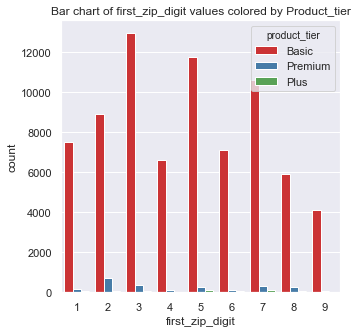

In [26]:
### Let's go ahead and analyse discrete variables contribution to the target variable.

def analyse_discrete(df, var):
    df = df.copy()
    plt.figure(figsize=(5,5))
    sns.countplot(x=var,hue='product_tier',data=df,palette='Set1')
    plt.title("Bar chart of " +var+ " values colored by Product_tier", fontsize=12)
    #plt.xlabel("Null - 0:No ; 1:Yes", fontsize=12)
    
for var in discrete_vars:
    analyse_discrete(data_copy_clean,var)

Following points were observed from above graph:
<ol>
<li> We can see that there is no monotonic relationship between first_zip_digit and Product_tier. </li>
<li> first_zip_digit is a significant variable because it has contributed to the likelyhood of article being in a significant tier. With zip 3,5,7 contributed to higher likelyhood of buying a basic tier product. </li>
<li> The likelyhood of buying a Premium tier product has been found a little higher in zip digit 2,3,7 and 8. </li>
</ol>

In [27]:
#========================================================================================
# Numerical variables: Continuous variables
#========================================================================================

### Let's go ahead and find the distribution of the continuous variables. 
### We will consider all those variables that are not temporal(date) or discrete 
### in our dataset.

# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+['article_id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  5


In [28]:
### let's visualise the continuous variables
data_copy_clean[cont_vars].head()

,price,search_views,detail_views,ctr_calc,stock_days_dt_int
0,16750,3091.0,123.0,0.039793,31
1,35950,3283.0,223.0,0.067926,52
2,11950,3247.0,265.0,0.081614,51
3,1750,1856.0,26.0,0.014009,101
4,26500,490.0,20.0,0.040816,11


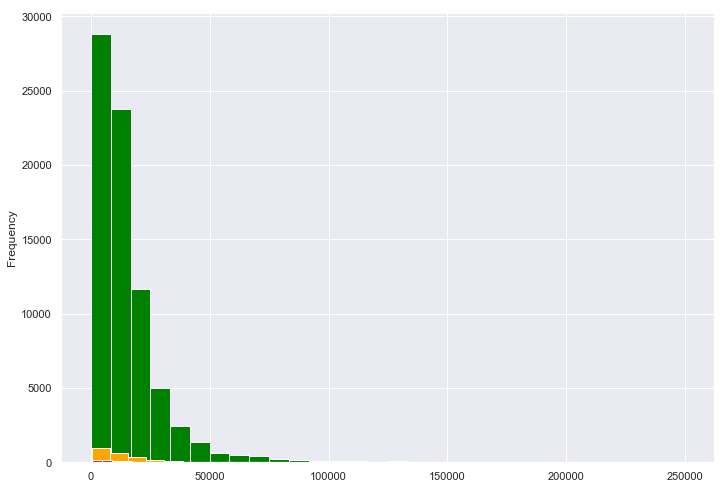

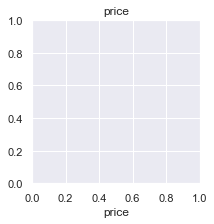

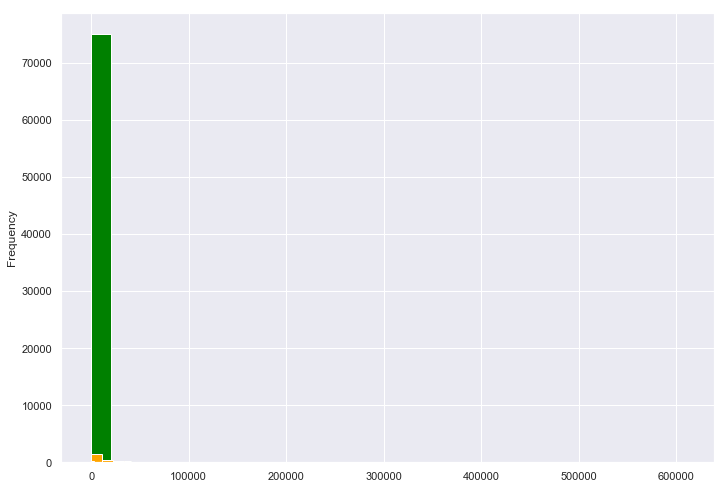

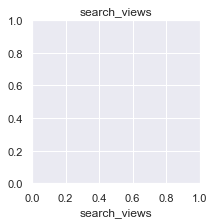

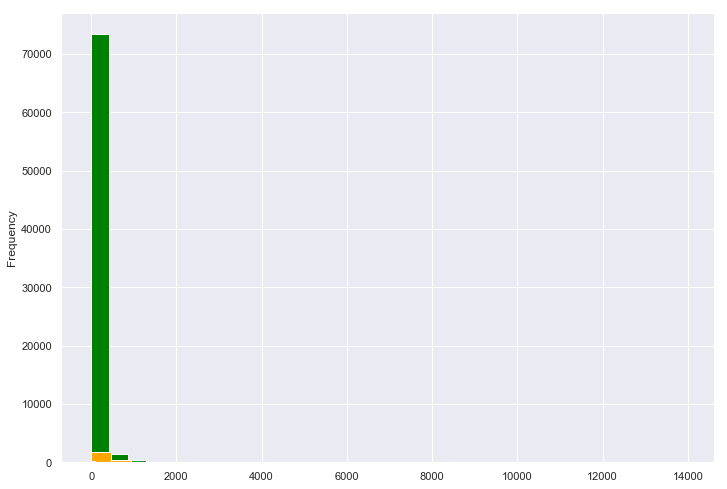

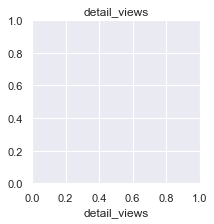

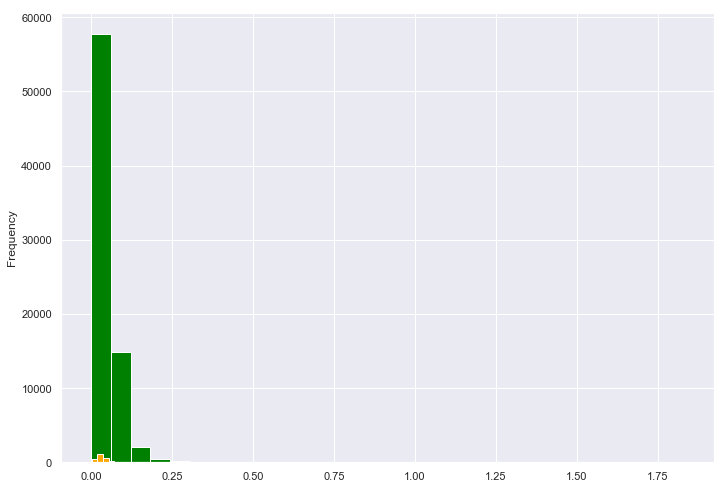

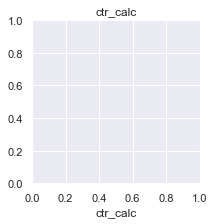

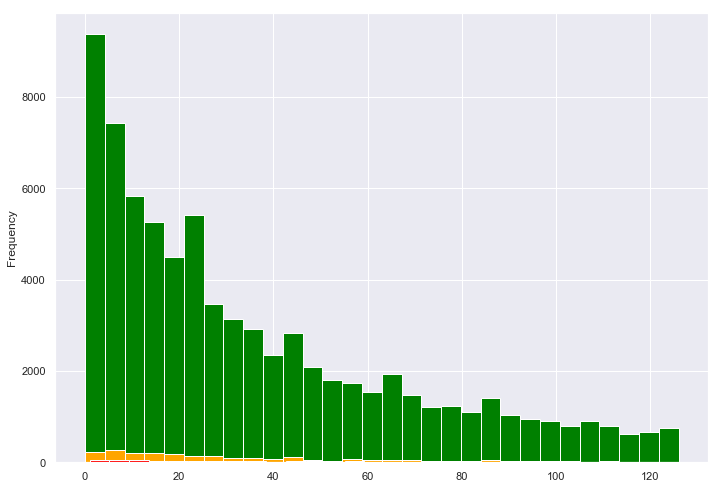

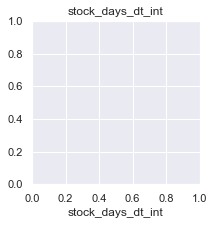

In [29]:
### Let's go ahead and analyse the distributions of these variables with target variable
def analyse_continous(df, var):
    df = df.copy()
    #df[var].hist(bins=20)
    df[df['product_tier']=="Basic"][var].plot.hist(bins=30,color='green',label='Basic')
    df[df['product_tier']=="Premium"][var].plot.hist(bins=30, color='orange',label='Premium')
    df[df['product_tier']=="Plus"][var].plot.hist(bins=30, color='red',label='Plus')
    plt.figure(figsize=(3,3))
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data_copy_clean, var)

The understanding from the distribution of these plots is as follows:

<ol>
<li> The likelyhood of purchasing a product is higher in price range 0 to 50,000. Also, there are outliners too in the price variable. </li>
<li> The search_views are higher around 0 to 1000. Also, there are outliners too in the search_views variable.</li>
<li> The detail_views are higher around 0 to 1000. Also, there are outliners too in the detail_views variable.</li>
<li> The ctr_calc are higher around 0 to 0.25. Also, there are outliners too in the ctr_calc variable.</li>
<li> The stock_days_dt_int are well distributed from 0 to 120. There are no outliners in this variable.</li>
</ol>

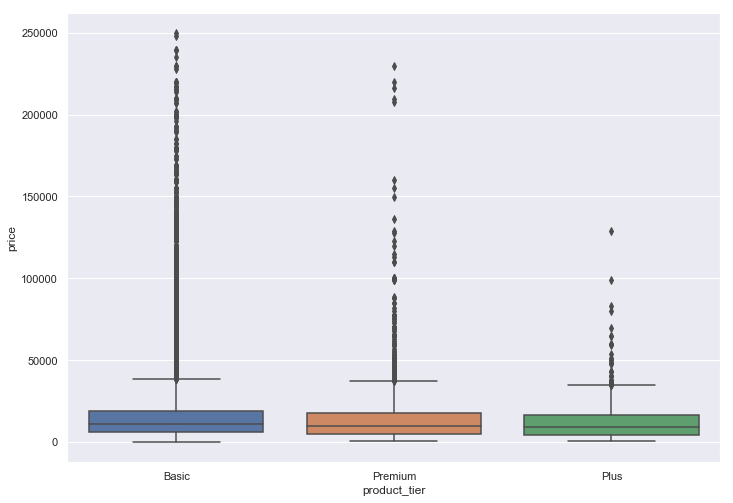

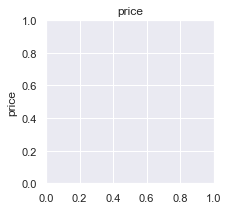

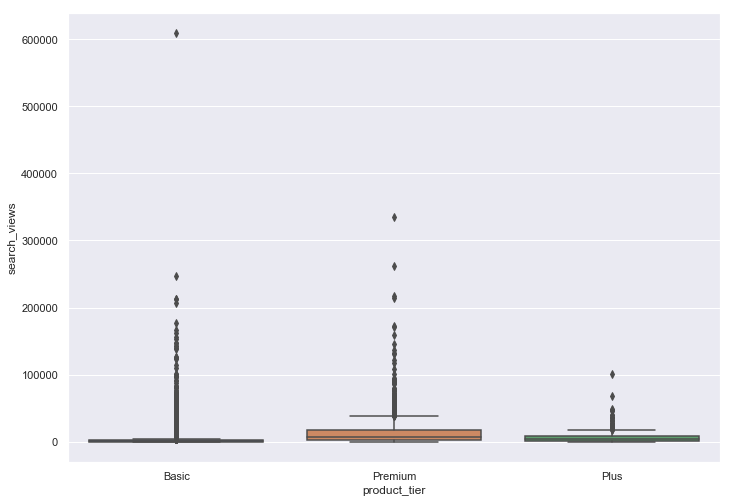

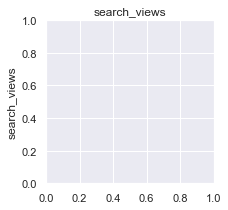

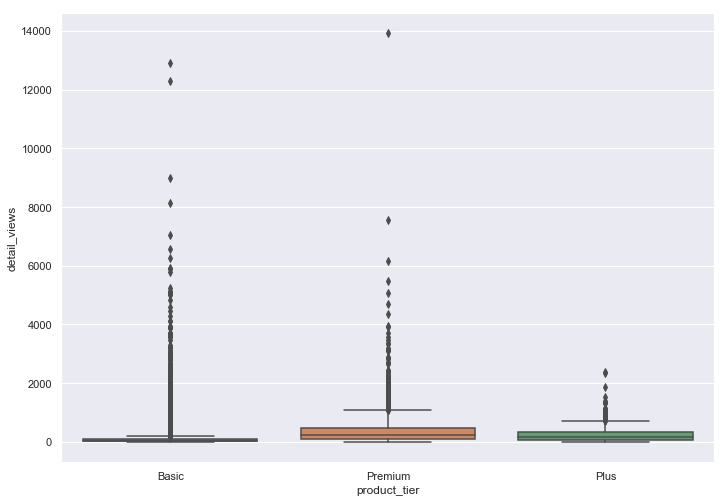

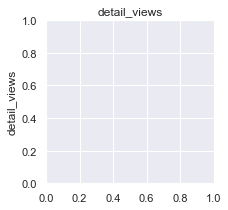

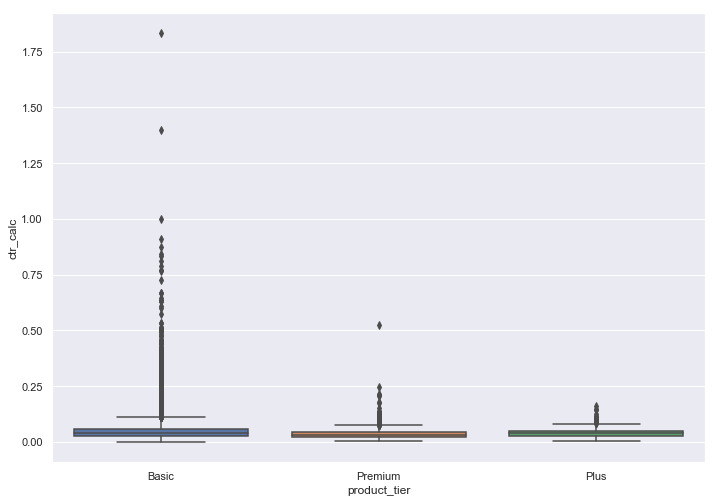

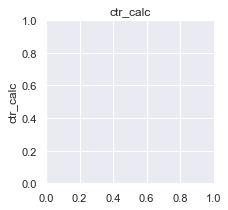

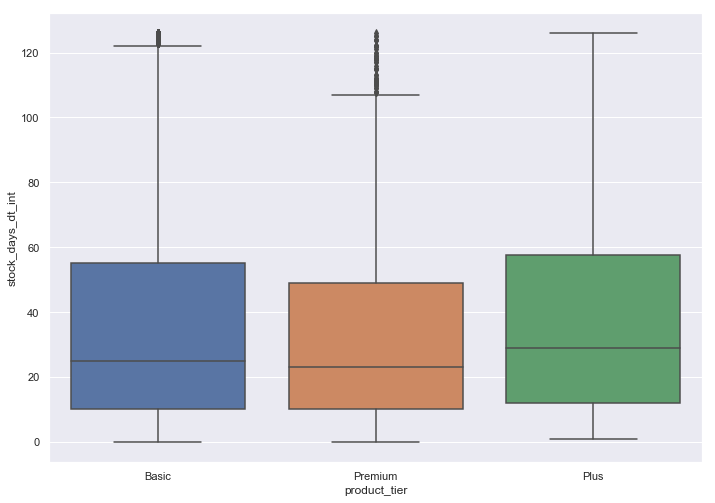

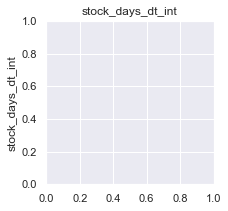

In [30]:
#========================================================================================
# Checking Outliers
#========================================================================================

# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    sns.boxplot(x=df['product_tier'],y=df[var])
    plt.xlabel("product_tier")
    plt.figure(figsize=(3,3))
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in cont_vars:
    find_outliers(data_copy_clean, var)

The observations from above graphs is as follows:
<ol>
<li> For the variable 'price', the price of 50% of articles from all categories is below 30K, and reaches to atmost 45K for all categories. There are a lot of outliners above the price range of 40K for all the product_tier categories. </li>
<li> The search_views for 50% articles from all categories is around 10K with a top whisker streching to around 25K for Premium category. There are a lot of outliners above the price range of 25K for all the product_tier categories. </li>
<li> The detail_views for 50% articles from all categories are below 1000, with the top whisker reaching to around 1500 for Premium tier articles. There are a lot of outliners above the price range of 15K for all the product_tier categories. </li>
<li> The ctr value for 50% of the articles is below 0.05. There are a lot of outliners above the price range of 0.15 for all the product_tier categories. </li>
<li> Articles from all categories were stocked for atleast 10 days and 50% of the articles were stocked for around 25 days. </li>
</ol>

In [31]:
#==============================================================================
# Categorical variables 
#==============================================================================

### Let's go ahead and analyse the categorical variables present in the dataset.

cat_vars = [var for var in data_copy_clean.columns if data_copy_clean[var].dtypes=='O' and var not in ['product_tier'] ]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  1


In [32]:
### let's visualise the values of the categorical variables
data_copy_clean[cat_vars].head()

,make_name
0,Mitsubishi
1,Mercedes-benz
2,Mercedes-benz
3,Ford
4,Mercedes-benz


In [33]:
#==============================================================================
# Cardinality: Number of labels in a column
#==============================================================================

### Let's evaluate how many different categories are present in each of the variables.

for var in cat_vars:
    print(var, len(data_copy_clean[var].unique()), ' categories')

make_name 91  categories


product_tier categorical variables show low cardinality except make_name; this means that make_name has large number of different labels. We need to tackle high cardinality in following steps as it can lead too **over-fitting** of the model.

In [34]:
#==============================================================================
# Rare labels
#==============================================================================

### Let's go ahead and investigate now if there are labels that are present only 
### in small proportion, i.e., below 1% of data

def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['product_tier'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data_copy_clean, var, 0.01))
    print()

make_name
Abarth        0.000268
Ac            0.000013
Aixam         0.000306
Alfa romeo    0.006794
Alpina        0.000089
                ...   
Tata          0.000013
Tesla         0.001073
Triumph       0.000485
Trucks-lkw    0.000230
Tvr           0.000013
Name: product_tier, Length: 70, dtype: float64



Around 70 labels in make_name are present in less than 1% of the data. **Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.**

We will remove rare lables here because high cardinal variables causes over-fitting.

In [35]:
### Finally, we want to explore the relationship between the categories of the different variables and product_tier

def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the loan purchasers
    df = df.copy()
    tmp = df.groupby(var)['product_tier'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(data_copy_clean, var, 0.01)  # 1% of the data
    data_copy_clean[var] = np.where(data_copy_clean[var].isin(frequent_ls), data_copy_clean[var], 'Rare')

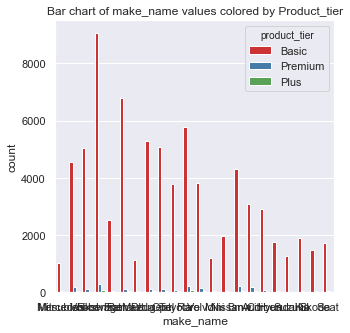

In [36]:
# let's make histogram to visualise all categories of make_name
for var in cat_vars:
    analyse_discrete(data_copy_clean, var)

Text(0, 0.5, 'Earning in Currency Unit')

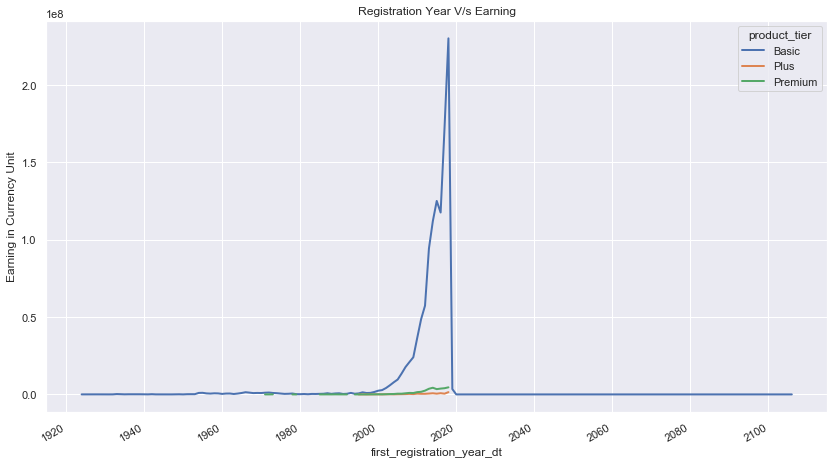

In [37]:
#==============================================================================
# Temporal Variable: Year Wise
#==============================================================================

# let's see how the selling of articles is connected with 
# registration date among different product tiers

fig = data_copy_clean.groupby(['first_registration_year_dt','product_tier'])['price'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Registration Year V/s Earning')
fig.set_ylabel('Earning in Currency Unit')

The observations from above graphs is as follows:
<ol>
<li> The car with registration year from 2000 till 2020 are very popular in basic category. </li>
<li> In the premium category, the car from registration year 2010 were sold primarily. </li>
<li> There are cars with future registration, which is incorrect and has to be taken in account in feature engineering. </li>
</ol>

Text(0.5, 0, 'Date')

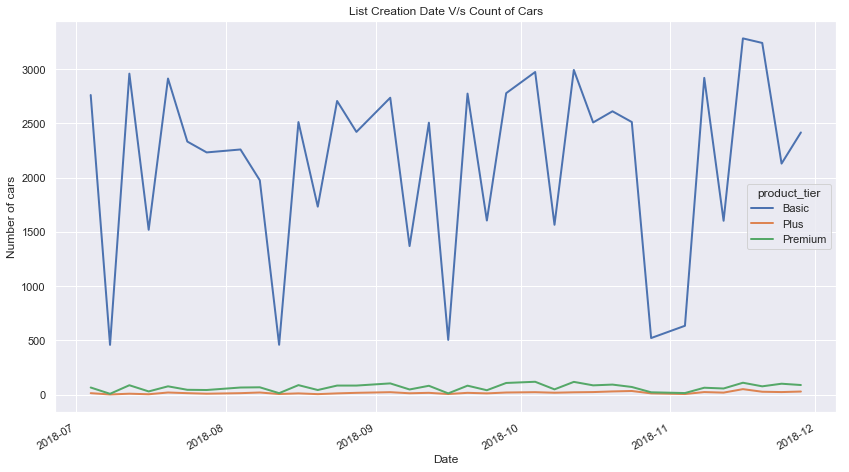

In [38]:
#==============================================================================
# Temporal Variable: Month Wise
#==============================================================================

# let's see how the listing of articles is connected with 
# number of article listed among different product tiers

fig = data_copy_clean.groupby(['created_date_dt','product_tier'])['article_id'].count().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('List Creation Date V/s Count of Cars')
fig.set_ylabel('Number of cars')
fig.set_xlabel('Date')

The observations from above graphs is as follows:
<ol>
<li> The basic tier cars were listed more than Plus and Premium tier. </li>
<li> Premium Cars were listed more than Plus tier cars. </li>
<li> There are some weeks when the Basic Car listing dropped. For this, I have to extract the week number to have a clear view. </li>
</ol>

Text(0.5, 0, 'Date')

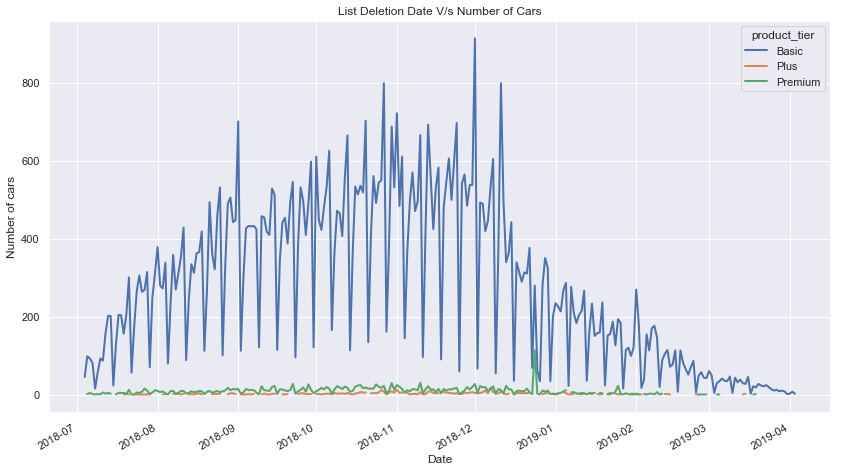

In [39]:
#==============================================================================
# Temporal Variable: Month Wise
#==============================================================================

# let's see how the deletion of list articles is connected with 
# number of article list deleted among different product tiers

fig = data_copy_clean.groupby(['deleted_date_dt','product_tier'])['article_id'].count().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('List Deletion Date V/s Number of Cars')
fig.set_ylabel('Number of cars')
fig.set_xlabel('Date')

The observations from above graphs is as follows:
<ol>
<li> Cars listing was more that Cars list deletion. </li>
<li> The basic tier cars were deleted more than Plus and Premium tier. </li>
<li> If list deletion means the selling of a car, then the car sales were high in the month of October, Novemner and December.</li>
</ol>

Text(0.5, 0, 'Weeks')

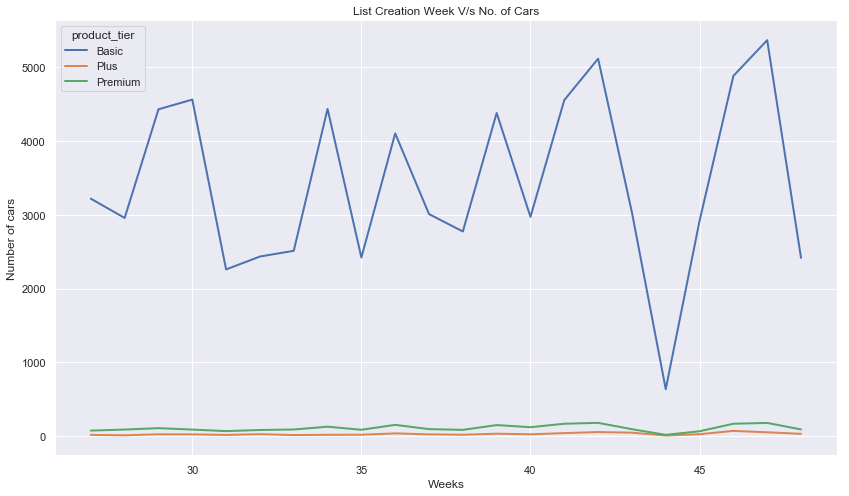

In [40]:
#==============================================================================
# Temporal Variable: Week Wise
#==============================================================================

### Extracting week of year from date, varies from 1 to 52

data_copy_clean['created_date_dt_week'] = data_copy_clean['created_date_dt'].dt.week

data_copy_clean[['created_date_dt', 'created_date_dt_week']].head()

# let's see how the listing of articles is connected with 
# number of article listed among different product tiers

fig = data_copy_clean.groupby(['created_date_dt_week','product_tier'])['article_id'].count().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('List Creation Week V/s No. of Cars')
fig.set_ylabel('Number of cars')
fig.set_xlabel('Weeks')

Text(0.5, 0, 'Week')

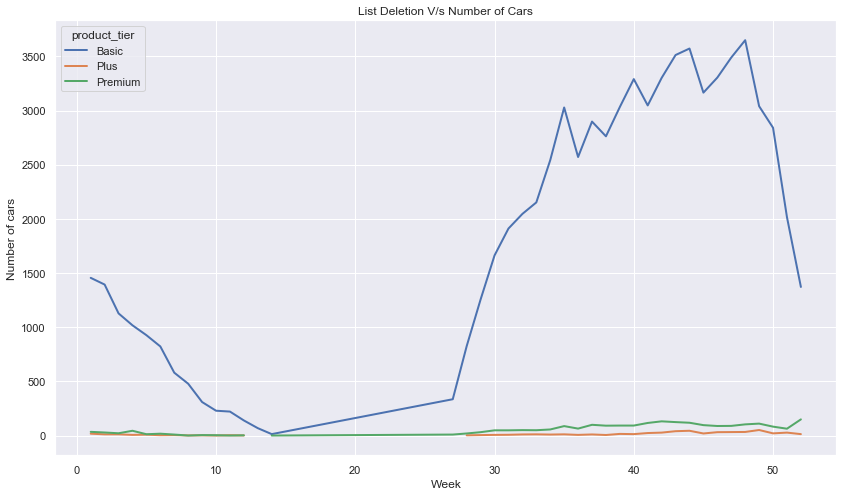

In [41]:
#==============================================================================
# Temporal Variable: Week Wise
#==============================================================================

### Extracting week of year from date, varies from 1 to 52

data_copy_clean['deleted_date_dt_week'] = data_copy_clean['deleted_date_dt'].dt.week

data_copy_clean[['deleted_date_dt', 'deleted_date_dt_week']].head()

# let's see how the deletion of list articles is connected with 
# number of article list deleted among different product tiers

fig = data_copy_clean.groupby(['deleted_date_dt_week','product_tier'])['article_id'].count().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('List Deletion V/s Number of Cars')
fig.set_ylabel('Number of cars')
fig.set_xlabel('Week')

From the above analysis of Date, we found that **'No. of Stock days'** obtained from 'list creation date' and 'list deletion date' is much reliable to be used for model creation.

#### ==============================================================================
#### **Feature Engineering:**
#### ==============================================================================

In the following cells, we will engineer / pre-process the variables of the Data Set. We will engineer the variables so that we tackle:

<ol>
<li> Missing values. </li>
<li> Zero values. </li>
<li> Negative values / Outliners. </li>
<li> Categorical variables: remove rare labels. </li>
<li> LabelEncoder: convert strings labels to numbers. </li>
<li> Feature Scaling:Standarise the values of the variables to the same range. </li>
</ol>

In [42]:
#==============================================================================
# Import Required Packages
#==============================================================================

### to handle datasets
import pandas as pd
import numpy as np

### for plotting
import matplotlib.pyplot as plt
%matplotlib inline

### to divide train and test set
from sklearn.model_selection import train_test_split

### feature scaling
from sklearn.preprocessing import MinMaxScaler

### Label Encoding
from sklearn.preprocessing import LabelEncoder

### to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import seaborn as sns

### for Q-Q plots
import pylab
import scipy.stats as stats

In [43]:
### Looking in data information
print(data_copy_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78305 entries, 0 to 78320
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   article_id                     78305 non-null  int64          
 1   product_tier                   78305 non-null  object         
 2   make_name                      78305 non-null  object         
 3   price                          78305 non-null  int64          
 4   first_zip_digit                78305 non-null  int64          
 5   search_views                   78295 non-null  float64        
 6   detail_views                   78295 non-null  float64        
 7   first_registration_year_dt     78305 non-null  datetime64[ns] 
 8   first_registration_year_dt_yr  78305 non-null  int64          
 9   created_date_dt                78305 non-null  datetime64[ns] 
 10  deleted_date_dt                78305 non-null  datetime64[ns] 
 11  st

In [44]:
#==============================================================================
# Remove Insignificant variables
#==============================================================================

### We will remove all the insignificant variables which were found out in the previous step of Exploratory Data Analysis

master_data = data_copy_clean.drop(['article_id','first_registration_year_dt','created_date_dt','deleted_date_dt','stock_days_dt','created_date_dt_week','deleted_date_dt_week'], axis = 1)
print(master_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78305 entries, 0 to 78320
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_tier                   78305 non-null  object 
 1   make_name                      78305 non-null  object 
 2   price                          78305 non-null  int64  
 3   first_zip_digit                78305 non-null  int64  
 4   search_views                   78295 non-null  float64
 5   detail_views                   78295 non-null  float64
 6   first_registration_year_dt_yr  78305 non-null  int64  
 7   ctr_calc                       78281 non-null  float64
 8   stock_days_dt_int              78305 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.0+ MB
None


In [45]:
#==============================================================================
# Balanced v/s Imbalanced Dataset
#==============================================================================

### Checking if the dataset is balanced or imbalanced

master_data.product_tier.value_counts()

Basic      75414
Premium     2317
Plus         574
Name: product_tier, dtype: int64

The dataset is highly imbalanced. It will be balanced later during model creation.

In [46]:
#==============================================================================
# Creating label for target variable
#==============================================================================

### We will create labels for target variable before hand. It will help us to make it easier going forward

###Transforming Nominal Attributes
lbl_encde = LabelEncoder()
product_tier_lbl = lbl_encde.fit_transform(master_data["product_tier"])
master_data["product_tier_lbl"] = product_tier_lbl
master_data.head()

,product_tier,make_name,price,first_zip_digit,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int,product_tier_lbl
0,Basic,Mitsubishi,16750,5,3091.0,123.0,2013,0.039793,31,0
1,Basic,Mercedes-benz,35950,4,3283.0,223.0,2015,0.067926,52,0
2,Basic,Mercedes-benz,11950,3,3247.0,265.0,1998,0.081614,51,0
3,Basic,Ford,1750,6,1856.0,26.0,2003,0.014009,101,0
4,Basic,Mercedes-benz,26500,3,490.0,20.0,2014,0.040816,11,0


In [47]:
#==============================================================================
# Separate dataset into train and test
#==============================================================================

### Before beginning to engineer our features, it is important to separate our 
### data intro training and testing set. This is to avoid over-fitting. This step 
### involves randomness, therefore, we need to set the seed.

### Let's separate into train and test set
### Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(master_data, master_data.product_tier_lbl,
                                                    test_size=0.3,
                                                    random_state=0,shuffle=False) # we are setting the seed here
X_train.shape, X_test.shape


((54813, 10), (23492, 10))

In [49]:
#==============================================================================
# Handling Outliners: Checking the outliner and Capping them
#==============================================================================

### function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    #plt.ylabel('price')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

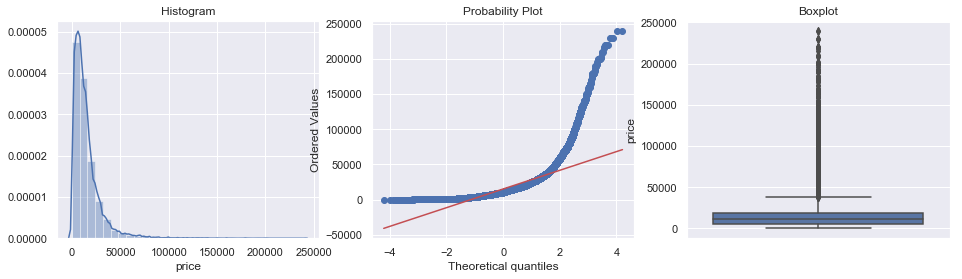

In [50]:
#==============================================================================
#==============================================================================

### Checking the distribution of price variable in the dataset

diagnostic_plots(X_train,'price')

#==============================================================================
#==============================================================================

'price' is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

C:\Users\aksha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aksha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\aksha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\aksha\Anaconda3\lib\site-packages\scip

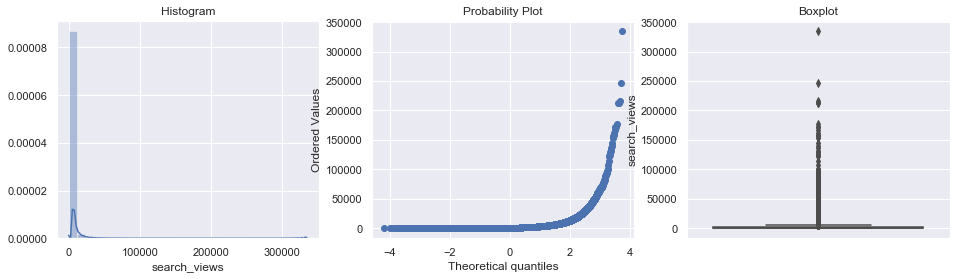

In [51]:
#==============================================================================
#==============================================================================

### Checking the distribution of search_views variable

diagnostic_plots(X_train,'search_views')

#==============================================================================
#==============================================================================

'search_views' is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

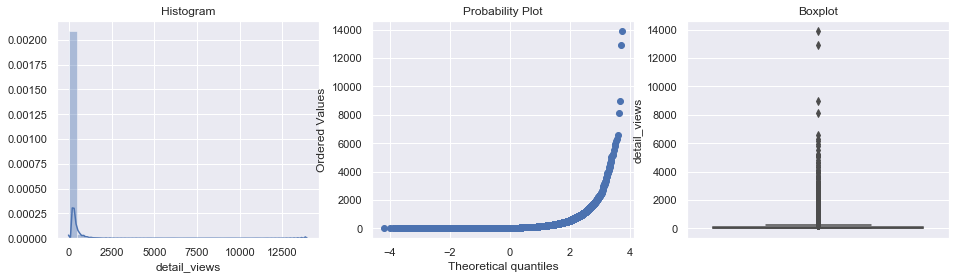

In [52]:
#==============================================================================
#==============================================================================

### Checking the distribution of detail_views variable

diagnostic_plots(X_train,'detail_views')

#==============================================================================
#==============================================================================

'detail_views' is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

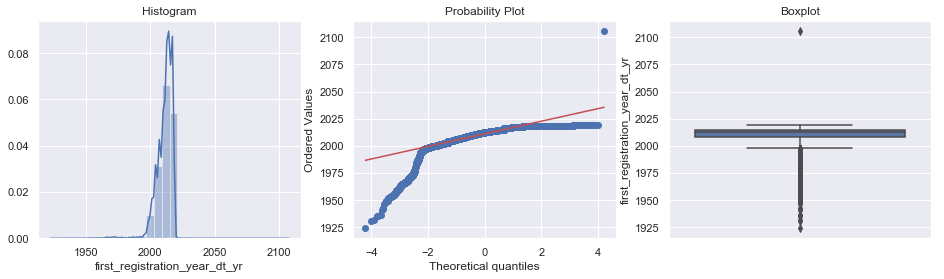

In [53]:
#==============================================================================
#==============================================================================

### Checking the distribution of each variable

diagnostic_plots(X_train,'first_registration_year_dt_yr')

#==============================================================================
#==============================================================================

'first_registration_year_dt_yr' is not normally distributed, it is skewed with a tail to the left. According to the boxplot, there are some outliers at the left end of the distribution of the variable.

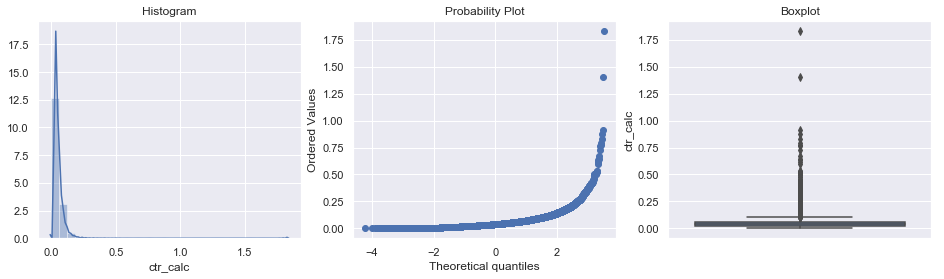

In [54]:
#==============================================================================
#==============================================================================

### Checking the distribution of ctr_calc variable

diagnostic_plots(X_train,'ctr_calc')

#==============================================================================
#==============================================================================

'ctr_calc' is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

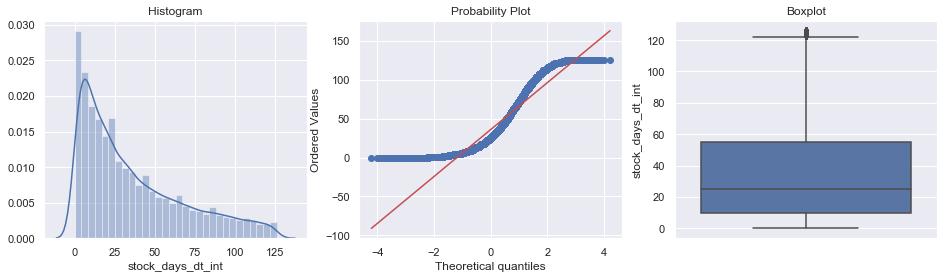

In [55]:
#==============================================================================
#==============================================================================

### Checking the distribution of stock_days_dt_int variable

diagnostic_plots(X_train,'stock_days_dt_int')

#==============================================================================
#==============================================================================

'stock_days_dt_int' is almost normally distributed, it is skewed with a little tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

In [56]:
#==============================================================================
# Capping: Find the upper and lower boundaries of each of these variable
#==============================================================================

### function to find upper and lower boundaries for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [57]:
#==============================================================================
#==============================================================================

### Finding the boundaries of price variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'price', 1.5)
upper_boundary, lower_boundary

(38500.0, -13900.0)

In [58]:
### Capping the 'price' variable with boundary value

### lets look at the number and percentage of outliers for 'price'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 38500: {}'.format(
    len(X_train[X_train['price'] > upper_boundary])))
print()
print('% articles with price bigger than 38500: {}'.format(
    len(X_train[X_train['price'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 38500: 3182

% articles with price bigger than 38500: 0.058051921989309106


The upper boundary shows a value of ~38500. The lower boundary is negative, however the variable price does not take negative values. So to calculate the outliers for price we will only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 3182 articles, 5.8 % of the dataset, with extremely high values for price.

In [59]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['price']= np.where(X_train['price'] > upper_boundary, upper_boundary,
                       np.where(X_train['price'] < 0, 0,X_train['price']))

X_test['price']= np.where(X_test['price'] > upper_boundary, upper_boundary,
                       np.where(X_test['price'] < 0, 0,X_test['price']))

#==============================================================================
#==============================================================================

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [60]:
#==============================================================================
#==============================================================================

### Finding the boundaries of search_views variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'search_views', 1.5)
upper_boundary, lower_boundary

(5000.0, -2408.0)

In [61]:
### lets look at the number and percentage of outliers
### for 'search_views'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 5000: {}'.format(
    len(X_train[X_train['search_views'] > upper_boundary])))
print()
print('% articles with price bigger than 5000: {}'.format(
    len(X_train[X_train['search_views'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 5000: 5237

% articles with price bigger than 5000: 0.09554302811376864


The upper boundary shows a value of ~5000. The lower boundary is negative, however the variable search_views does not take negative values. So to calculate the outliers for search_views we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 5237 articles, 9.5 % of the dataset, with extremely high values for search_view.

In [62]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['search_views']= np.where(X_train['search_views'] > upper_boundary, upper_boundary,
                       np.where(X_train['search_views'] < 0, 0 ,X_train['search_views']))

X_test['search_views']= np.where(X_test['search_views'] > upper_boundary, upper_boundary,
                       np.where(X_test['search_views'] < 0, 0,X_test['search_views']))

#==============================================================================
#==============================================================================

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [63]:
#==============================================================================
#==============================================================================

### Finding the boundaries of detail_views variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'detail_views', 1.5)
upper_boundary, lower_boundary

(213.0, -107.0)

In [64]:
### lets look at the number and percentage of outliers
### for 'detail_views'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 213: {}'.format(
    len(X_train[X_train['detail_views'] > upper_boundary])))
print()
print('% articles with price bigger than 213: {}'.format(
    len(X_train[X_train['detail_views'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 213: 5373

% articles with price bigger than 213: 0.09802419134147008


The upper boundary shows a value of ~213. The lower boundary is negative, however the variable detail_views does not take negative values. So to calculate the outliers for search_views we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 5373 articles, 9.8 % of the dataset, with extremely high values for detail_view.

In [65]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['detail_views']= np.where(X_train['detail_views'] > upper_boundary, upper_boundary,
                       np.where(X_train['detail_views'] < 0, 0 ,X_train['detail_views']))

X_test['detail_views']= np.where(X_test['detail_views'] > upper_boundary, upper_boundary,
                       np.where(X_test['detail_views'] < 0, 0,X_test['detail_views']))

#==============================================================================
#==============================================================================

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [66]:
#==============================================================================
#==============================================================================

### Finding the boundaries of first_registration_year_dt_yr variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'first_registration_year_dt_yr', 1.5)
upper_boundary, lower_boundary

(2025.5, 1997.5)

In [67]:
### lets look at the number and percentage of outliers
### for 'first_registration_year_dt_yr'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with first_registration_year bigger than 2020: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] > 2020])))
print()
print('% articles with first_registration_year bigger than 2020: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] > 2020])/len(X_train)))
print()
print('articles with first_registration_year lower than 1997: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] < 1997])))
print()
print('% articles with first_registration_year lower than 1997: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] < 1997])/len(X_train)))

total articles: 54813

articles with first_registration_year bigger than 2020: 1

% articles with first_registration_year bigger than 2020: 1.8243847262510718e-05

articles with first_registration_year lower than 1997: 867

% articles with first_registration_year lower than 1997: 0.015817415576596792


The upper boundary shows a value of ~2025. The lower boundary is 1997, however the variable first_registration_year_dt_yr does not take 2025 as an upper value. So to calculate the outliers for search_views we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 867 articles below 1997, 1.5 % of the dataset, with extremely low values for first_registration_year_dt_yr.

In [68]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['first_registration_year_dt_yr']= np.where(X_train['first_registration_year_dt_yr'] > upper_boundary, 2020,
                       np.where(X_train['first_registration_year_dt_yr'] < lower_boundary, 1998 ,X_train['first_registration_year_dt_yr']))

X_test['first_registration_year_dt_yr']= np.where(X_test['first_registration_year_dt_yr'] > upper_boundary, 2020,
                       np.where(X_test['first_registration_year_dt_yr'] < lower_boundary, 1998 ,X_test['first_registration_year_dt_yr']))

#==============================================================================
#==============================================================================

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [69]:
#==============================================================================
#==============================================================================

### Finding the boundaries of ctr_calc variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'ctr_calc', 1.5)
upper_boundary, lower_boundary

(0.10977958634995248, -0.026944091269654486)

In [70]:
### lets look at the number and percentage of outliers
### for 'ctr_calc'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 0.10977: {}'.format(
    len(X_train[X_train['ctr_calc'] > upper_boundary])))
print()
print('% articles with price bigger than 0.10977: {}'.format(
    len(X_train[X_train['ctr_calc'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 0.10977: 2789

% articles with price bigger than 0.10977: 0.05088209001514239


The upper boundary shows a value of ~0.10977. The lower boundary is negative, however the variable ctr_calc does not take negative values. So to calculate the outliers for ctr_calc we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 2789 articles below 0.10977, 5.0 % of the dataset, with extremely high values for ctr_calc.

In [71]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['ctr_calc']= np.where(X_train['ctr_calc'] > upper_boundary, upper_boundary,
                       np.where(X_train['ctr_calc'] < 0, 0,X_train['ctr_calc']))

X_test['ctr_calc']= np.where(X_test['ctr_calc'] > upper_boundary, upper_boundary,
                       np.where(X_test['ctr_calc'] < 0, 0,X_test['ctr_calc']))

#==============================================================================
#==============================================================================

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [72]:
#==============================================================================
#==============================================================================

### Finding the boundaries of stock_days_dt_int variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'stock_days_dt_int', 1.5)
upper_boundary, lower_boundary

(122.5, -57.5)

In [73]:
# lets look at the number and percentage of outliers
# for 'stock_days_dt_int'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 122: {}'.format(
    len(X_train[X_train['stock_days_dt_int'] > upper_boundary])))
print()
print('% articles with price bigger than 122: {}'.format(
    len(X_train[X_train['stock_days_dt_int'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 122: 409

% articles with price bigger than 122: 0.007461733530366884


In [74]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['stock_days_dt_int']= np.where(X_train['stock_days_dt_int'] > upper_boundary, 122,
                       np.where(X_train['stock_days_dt_int'] < 0, 0,X_train['stock_days_dt_int']))

X_test['stock_days_dt_int']= np.where(X_test['stock_days_dt_int'] > upper_boundary, 122,
                       np.where(X_test['stock_days_dt_int'] < 0, 0,X_test['stock_days_dt_int']))

#==============================================================================
#==============================================================================

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [75]:
#==============================================================================
# Missing values: Categorical Variables
#==============================================================================

### For categorical variables, we will fill missing information by adding an additional category: "missing"

# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in master_data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 6),  ' % missing values')

There are no missing values in categorical variable.

In [76]:
#==============================================================================
# Missing values: Numerical Variables
#==============================================================================

### For numerical variables, we are going to add an additional variable capturing 
### the missing information, and then replace the missing information in the original 
### variable by the mean (avg) or mode, or most frequent value:

# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in master_data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 6),  ' % missing values')

search_views 7.3e-05  % missing values
detail_views 7.3e-05  % missing values
ctr_calc 0.000201  % missing values


In [77]:
### ALl three of the variables are continuous in nature, for which we will take mean value. 
### If a variable is discrete, then we will take mode value.

# list of numerical variables
num_vars = [var for var in master_data.columns if master_data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
master_data[num_vars].head()

Number of numerical variables:  8


,price,first_zip_digit,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int,product_tier_lbl
0,16750,5,3091.0,123.0,2013,0.039793,31,0
1,35950,4,3283.0,223.0,2015,0.067926,52,0
2,11950,3,3247.0,265.0,1998,0.081614,51,0
3,1750,6,1856.0,26.0,2003,0.014009,101,0
4,26500,3,490.0,20.0,2014,0.040816,11,0


In [78]:
### list of discrete variables
discrete_vars = [var for var in num_vars if len(master_data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

# let's visualise the discrete variables
master_data[discrete_vars].head()

Number of discrete variables:  2


,first_zip_digit,product_tier_lbl
0,5,0
1,4,0
2,3,0
3,6,0
4,3,0


In [79]:
### list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

### let's visualise the continuous variables
master_data[cont_vars].head()

Number of continuous variables:  6


,price,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int
0,16750,3091.0,123.0,2013,0.039793,31
1,35950,3283.0,223.0,2015,0.067926,52
2,11950,3247.0,265.0,1998,0.081614,51
3,1750,1856.0,26.0,2003,0.014009,101
4,26500,490.0,20.0,2014,0.040816,11


In [80]:
### replace the missing values
for var in vars_with_na:
    
    if var in discrete_vars:
        # calculate the mode
        mode_val = X_train[var].mode()[0]
    
        # train
        X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
        X_train[var].fillna(mode_val, inplace=True)
    
        # test
        X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
        X_test[var].fillna(mode_val, inplace=True)
        
    else:
        # calculate the mean
        mean_val = np.round(X_train[var].mean(),3)
    
        # train
        X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
        X_train[var].fillna(mean_val, inplace=True)
    
        # test
        X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
        X_test[var].fillna(mean_val, inplace=True)

### check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

search_views    0
detail_views    0
ctr_calc        0
dtype: int64

In [81]:
### check that test set does not contain null values in the engineered variables
tst_vars_with_na =[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

### print the variable name and the percentage of missing values
for var in tst_vars_with_na:
    print(var, np.round(X_test[var].isnull().mean(), 3),  ' % missing values')

In [82]:
#==============================================================================
# Categorical variables
#==============================================================================

### First, we will remove those categories within variables that are present in less than 1% of the observations:

# let's capture the categorical variables first
cat_vars = [var for var in master_data.columns if master_data[var].dtype == 'O']

In [83]:
### Creating function to identify frequent labels

def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the loan purchasers
    df = df.copy()
    tmp = df.groupby(var)['product_tier'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    print(find_frequent_labels(X_train, var, 0.01))
    print()

Index(['Basic', 'Premium'], dtype='object', name='product_tier')

Index(['Audi', 'Bmw', 'Citroen', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Mazda',
       'Mercedes-benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Rare', 'Renault', 'Seat', 'Skoda', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'],
      dtype='object', name='make_name')



In [84]:
### Checking the labels of the categorical variables
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['product_tier'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(X_train, var, 0.01))
    print()
    print(analyse_rare_labels(X_test, var, 0.01))
    print()

product_tier
Plus    0.007608
Name: product_tier, dtype: float64

product_tier
Plus    0.006683
Name: product_tier, dtype: float64

Series([], Name: product_tier, dtype: float64)

Series([], Name: product_tier, dtype: float64)



In [85]:
#==============================================================================
# Zero values
#==============================================================================

### make a list of the variables that contain zero values
vars_with_zero = [var for var in master_data.columns if X_train[var].isin([0]).sum()>1 and var not in ['stock_days_dt_int','product_tier_lbl']]

### print the variable name and the percentage of missing values
for var in vars_with_zero:
    print(var, np.round(master_data[var].isin([0]).mean(), 6),  ' % zero values')

search_views 0.000179  % zero values
detail_views 0.016065  % zero values
ctr_calc 0.015887  % zero values


All three labels can be zero logically, and their proportion is not high. Therefore, I am keeping these variables.

In [86]:
#==============================================================================
# LabelEncoder: convert strings labels to numbers.
#==============================================================================

### Transforming Nominal Attributes
make_name_lbl = lbl_encde.fit_transform(X_train["make_name"])
X_train["make_name_lbl"] = make_name_lbl
X_train["make_name_lbl"].unique()

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([10,  8,  4, 20,  3, 15,  7, 13, 12, 19, 14, 21,  9, 11,  1,  0,  2,
        5, 18,  6, 17, 16])

In [87]:
### Transforming Nominal Attributes
make_name_lbl = lbl_encde.fit_transform(X_test["make_name"])
X_test["make_name_lbl"] = make_name_lbl
X_test["make_name_lbl"].unique()

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 4, 12, 20,  0,  1, 19,  5, 14, 21, 17, 15, 16,  8,  3,  6, 10, 11,
        9,  2, 18, 13,  7])

In [88]:
### check absence of na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

In [89]:
### Generally checking the data info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54813 entries, 0 to 54820
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_tier                   54813 non-null  object 
 1   make_name                      54813 non-null  object 
 2   price                          54813 non-null  float64
 3   first_zip_digit                54813 non-null  int64  
 4   search_views                   54813 non-null  float64
 5   detail_views                   54813 non-null  float64
 6   first_registration_year_dt_yr  54813 non-null  int64  
 7   ctr_calc                       54813 non-null  float64
 8   stock_days_dt_int              54813 non-null  int64  
 9   product_tier_lbl               54813 non-null  int32  
 10  search_views_na                54813 non-null  int32  
 11  detail_views_na                54813 non-null  int32  
 12  ctr_calc_na                    54813 non-null 

In [90]:
#### Drop unnecessary columns 
X_train = X_train.drop(['product_tier','make_name','product_tier_lbl','search_views_na','detail_views_na','ctr_calc_na'], axis = 1)
X_test = X_test.drop(['product_tier','make_name','product_tier_lbl','search_views_na','detail_views_na','ctr_calc_na'], axis = 1)

In [91]:
### Generally checking the data info after dropping columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54813 entries, 0 to 54820
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          54813 non-null  float64
 1   first_zip_digit                54813 non-null  int64  
 2   search_views                   54813 non-null  float64
 3   detail_views                   54813 non-null  float64
 4   first_registration_year_dt_yr  54813 non-null  int64  
 5   ctr_calc                       54813 non-null  float64
 6   stock_days_dt_int              54813 non-null  int64  
 7   make_name_lbl                  54813 non-null  int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 3.6 MB


In [92]:
#==============================================================================
# Feature Scaling
#==============================================================================

### For use in  models, features need to be either scaled or normalised. 
### I will scale features between the min and max values:

train_vars = [var for var in X_train.columns if var in ['price', 'first_zip_digit','search_views','detail_views','first_registration_year_dt_yr','ctr_calc','stock_days_dt_int']]
train_vars

['price',
 'first_zip_digit',
 'search_views',
 'detail_views',
 'first_registration_year_dt_yr',
 'ctr_calc',
 'stock_days_dt_int']

In [93]:
### fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

In [94]:
### Generally checking the data after Scaling
X_test.head()

,price,first_zip_digit,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int,make_name_lbl
54821,0.050689,0.875,0.1250,0.032864,0.227273,0.102023,0.262295,4
54822,0.266320,0.250,0.2866,0.206573,0.636364,0.279695,0.549180,12
54823,0.310533,0.375,0.3638,0.178404,0.590909,0.190296,0.737705,20
54824,0.387516,0.000,1.0000,1.000000,0.727273,0.331605,0.991803,12
54825,0.739922,0.375,1.0000,1.000000,0.500000,0.497754,0.983607,0


In [95]:
### let's now save the train and test sets for the next notebook!

X_train.to_csv('2_xtrain.csv', index=False)
X_test.to_csv('3_xtest.csv', index=False)
y_train.to_csv('4_ytrain.csv', index=False)
y_test.to_csv('5_ytest.csv', index=False)


#### ==============================================================================
#### **Feature Selection:**
#### ==============================================================================

In the following cells, we will select a group of variables, the most predictive ones, to build our machine learning models.

In [96]:
#==============================================================================
# Import Required Packages
#==============================================================================

# to handle datasets
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [97]:
#==============================================================================
# Brute Force Correlation Approach
#==============================================================================

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [98]:
# Find Correlated columns
corr_features = correlation(X_train, 0.7) #the correlation coeff. above 0.7 indicates strong relation.
len(set(corr_features))

print(corr_features)

{'detail_views'}


From above, the feature 'detail_view' is highly correlated to one of the feature. It will be removed from the dataset.

In [99]:
#==============================================================================
# WOE and IV
#==============================================================================

### Weight of evidence (WOE) and Information value (IV) are simple, yet powerful 
### techniques to perform variable transformation and selection.

#==============================================================================
#==============================================================================

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

#==============================================================================
#==============================================================================

Note: Python package is not available for WOE and IV calculation. The reference to above code for WOE and IV is available at following __[link](https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb)__ .

In [100]:
### Calculating Information Value of the features for feature selection
final_iv, IV = data_vars(X_train,y_train)

In [101]:
### The detailed information for bucked is as follows:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,price,0.000000,0.148244,13851,1092,0.078839,12759,0.921161,0.293154,0.249746,0.160257,0.010285
1,price,0.148479,0.283225,13557,908,0.066976,12649,0.933024,0.243758,0.247592,-0.015606,0.010285
2,price,0.283277,0.488947,13716,869,0.063357,12847,0.936643,0.233289,0.251468,-0.075040,0.010285
3,price,0.489467,1.000000,13689,856,0.062532,12833,0.937468,0.229799,0.251194,-0.089022,0.010285
4,first_zip_digit,0.000000,0.500000,34825,2557,0.073424,32268,0.926576,0.686443,0.631616,0.083241,0.013399
5,first_zip_digit,0.625000,1.000000,19988,1168,0.058435,18820,0.941565,0.313557,0.368384,-0.161144,0.013399
6,search_views,0.000000,0.034000,6107,21,0.003439,6086,0.996561,0.005638,0.119128,-3.050741,2.297243
7,search_views,0.034200,0.065200,6084,45,0.007396,6039,0.992604,0.012081,0.118208,-2.280848,2.297243
8,search_views,0.065400,0.102400,6084,67,0.011012,6017,0.988988,0.017987,0.117777,-1.879169,2.297243
9,search_views,0.102600,0.152200,6092,83,0.013624,6009,0.986376,0.022282,0.117621,-1.663690,2.297243


In [102]:
### Sorting and presenting the Information Value of the feature:
IV.sort_values('IV')

,VAR_NAME,IV
7,stock_days_dt_int,0.000001
4,make_name_lbl,0.000150
5,price,0.010285
3,first_zip_digit,0.013399
2,first_registration_year_dt_yr,0.082186
0,ctr_calc,0.185250
1,detail_views,1.789911
6,search_views,2.297243


The feature selection is done based on below points:
<ol>
<li> Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)</li>
<li> 0.02 to 0.1, then the predictor has only a weak relationship.</li>
<li> 0.1 to 0.3, then the predictor has a medium strength relationship.</li>
<li> 0.3 or higher, then the predictor has a strong relationship.</li>
</ol>

In [103]:
### Selecting the variables based on above rules:

slctd_feat_IV_WOE = IV[IV['IV'].between(0.01, 3, inclusive=False)]

# # let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(slctd_feat_IV_WOE)))
print('The features and IV values are as follows:')
slctd_feat_IV_WOE['VAR_NAME']

#==============================================================================
#==============================================================================

### Saving the features in a list.
slctd_feat_list = []
for var in slctd_feat_IV_WOE['VAR_NAME']:
    slctd_feat_list.append(var)
    
print(slctd_feat_list)

total features: 8
selected features: 6
The features and IV values are as follows:
['ctr_calc', 'detail_views', 'first_registration_year_dt_yr', 'first_zip_digit', 'price', 'search_views']


#### ==============================================================================
#### **ML Model build:**
#### ==============================================================================

In the following cells, we will finally build our machine learning models, utilising the engineered data and the pre-selected features. 

In [104]:
#==============================================================================
# Import Required Packages
#==============================================================================

# to handle datasets
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix #Importing performance metrics- accuracy score and confusion_matrix


# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [105]:
### Comparing the features in the data set and the selected features

X_train.info()
print(slctd_feat_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54813 entries, 0 to 54820
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          54813 non-null  float64
 1   first_zip_digit                54813 non-null  float64
 2   search_views                   54813 non-null  float64
 3   detail_views                   54813 non-null  float64
 4   first_registration_year_dt_yr  54813 non-null  float64
 5   ctr_calc                       54813 non-null  float64
 6   stock_days_dt_int              54813 non-null  float64
 7   make_name_lbl                  54813 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 3.6 MB
['ctr_calc', 'detail_views', 'first_registration_year_dt_yr', 'first_zip_digit', 'price', 'search_views']


In [106]:
### Removing the lest needed features

X_train_sltd_feat = X_train.drop(['price','stock_days_dt_int','make_name_lbl'], axis=1)
X_test_sltd_feat = X_test.drop(['price','stock_days_dt_int','make_name_lbl'], axis=1)

In [107]:
### Generally checking the selected features
X_test_sltd_feat.head()

,first_zip_digit,search_views,detail_views,first_registration_year_dt_yr,ctr_calc
54821,0.875,0.1250,0.032864,0.227273,0.102023
54822,0.250,0.2866,0.206573,0.636364,0.279695
54823,0.375,0.3638,0.178404,0.590909,0.190296
54824,0.000,1.0000,1.000000,0.727273,0.331605
54825,0.375,1.0000,1.000000,0.500000,0.497754


In [108]:
### Balancing the data-set

# Balancing DataSet by applying balancing techniques
# Installing imblearn library

!pip install imblearn

In [109]:
### Importing the function

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [110]:
# Modifying features with SMOTE

X_train_smote, y_train_smote = smote.fit_sample(X_train_sltd_feat,y_train)

In [111]:
# Checking if the variables are balanced or nor after applying SMOTE

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 52742, 2: 1654, 1: 417})
After SMOTE : Counter({0: 52742, 2: 52742, 1: 52742})


In [112]:
#### Creating the model, fitting it with train data and obtaining the results

# Make an instance of the model
logistic = LogisticRegression()

# Fitting the value for x and y
logistic.fit(X_train_smote, y_train_smote)

# Prediction from test data
prediction = logistic.predict(X_test_sltd_feat)

In [113]:
### Checking the results from the model

### Calculating the accuracy score
accuracy_score = accuracy_score(y_test,prediction)

print("The accuracy of the model is: \n")
print(accuracy_score)

The accuracy of the model is: 

0.7631959816107611


In [114]:
### Confusion Matrix
confusion_matrix = confusion_matrix(y_test,prediction)

print("The confusion matrix of the model is: \n")
print(confusion_matrix)

The confusion matrix of the model is: 

[[17514  2767  2391]
 [   52    45    60]
 [  162   131   370]]


In [115]:
### Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_test != prediction).sum())

Misclassified samples: 5563


In [116]:
print("Classification Report:")
print(classification_report(y_test, prediction))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     22672
           1       0.02      0.29      0.03       157
           2       0.13      0.56      0.21       663

    accuracy                           0.76     23492
   macro avg       0.38      0.54      0.37     23492
weighted avg       0.96      0.76      0.84     23492

 
 


**Observation**

The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li>Product_tier: 'Basic' and 'Premium' showed an average recall of 66%, i.e., 66 times out of 100 the actual tier was predicted correctly.  </li>
<li>Product_tier: 'Plus' showed a recall of only 30%. I can see that the buckets which had more samples performed better than the buckets with less sample. This is to be noted because the training data was balanced using SMOTE to remove any bias. </li>
</ol>

**Precision:**
<ol>
<li>Product_tier: 'Premium' and 'Plus' precision was not good, i.e., the precision of prediction has to be addressed for these two tiers. Similary as above, the training set was balanced before training the model, and imbalance bias should not have occured on the test set. </li>
</ol>

**Note:** Thoughts on algorithm, data and further improvements are given at bottom after Q2 in **'Conclusion'** Cell. 

In [118]:
#==============================================================================
# Checking the above data on Random Forest Classifier with basic estimator
#==============================================================================

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train_smote, y_train_smote)
print("The model score with RFC is: \n")
model.score(X_test_sltd_feat, y_test)


The model score with RFC is: 



0.9238038481185085

In [119]:
# Prediction on test data

y_predicted = model.predict(X_test_sltd_feat)

In [120]:
# Creating the confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21450,   361,   861],
       [  117,     8,    32],
       [  383,    36,   244]], dtype=int64)

In [121]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (y_test != y_predicted).sum())

Misclassified samples: 1790


In [122]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_predicted))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22672
           1       0.02      0.05      0.03       157
           2       0.21      0.37      0.27       663

    accuracy                           0.92     23492
   macro avg       0.40      0.46      0.42     23492
weighted avg       0.95      0.92      0.94     23492

 
 


**Observation**

The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li>Product_tier: 'Basic' and 'Premium' showed an average recall of 61%, i.e., 61 times out of 100 the actual tier was predicted correctly.  </li>
<li>Product_tier: 'Plus' showed a recall of only 3%. I can see that the buckets which had more samples performed better than the buckets with less sample. This is to be noted because the training data was balanced using SMOTE to remove any bias. </li>
</ol>

**Precision:**
<ol>
<li>Product_tier: 'Premium' and 'Plus' precision was not good, i.e., the precision of prediction has to be addressed for these two tiers. Similary as above, the training set was balanced before training the model, and imbalance bias should not have occured on the test set. </li>
</ol>

In [123]:
#==============================================================================
# Checking the above data on Random Forest Classifier with RandomizedSearchCV
#==============================================================================

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)

rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10, 25, 50, 100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train_smote, y_train_smote)

In [246]:
### Checking the parameters and score after hyperparameter tuning 

rf_parameters
#rf_ht_score

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [125]:
### Fitting the model with above selected parameters
classifier=RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_features = 2, 
                                 min_samples_leaf = 2, n_estimators = 500)

### fitting the features
classifier.fit(X_train_smote,y_train_smote)

### Predicting the Test set results
y_pred = classifier.predict(X_test_sltd_feat)

### Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[21511   317   844]
 [  122    10    25]
 [  370    36   257]]


In [126]:
### Calculating the accuracy
accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

0.9270389919972757


In [127]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22672
           1       0.03      0.06      0.04       157
           2       0.23      0.39      0.29       663

    accuracy                           0.93     23492
   macro avg       0.41      0.47      0.43     23492
weighted avg       0.95      0.93      0.94     23492

 
 


**Observation**

The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li>Product_tier: 'Basic' and 'Premium' showed an average recall of 61%, i.e., 61 times out of 100 the actual tier was predicted correctly.  </li>
<li>Product_tier: 'Plus' showed a recall of only 3%. I can see that the buckets which had more samples performed better than the buckets with less sample. This is to be noted because the training data was balanced using SMOTE to remove any bias. </li>
</ol>

**Precision:**
<ol>
<li>Product_tier: 'Premium' and 'Plus' precision was not good, i.e., the precision of prediction has to be addressed for these two tiers. Similary as above, the training set was balanced before training the model, and imbalance bias should not have occured on the test set. </li>
</ol>

Even Hypermeter tuning and bagging technique did not help in enhancing the model performace.

In [128]:
#==============================================================================
# Checking the above data on XGBoost Classifier with RandomizedSearchCV
#==============================================================================

### Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

### Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [129]:
### Preparing the XGB classifier

classifier=xgboost.XGBClassifier(objective='multi:softprob')

In [130]:
### fitting the parameters and seleting the best parameters from Hyperparameter tuning

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=40,n_jobs=-1,cv=9,verbose=3)

In [131]:
### fitting the data

random_search.fit(X_train_smote,y_train_smote)

Fitting 9 folds for each of 40 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 77.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 103.1min finished


RandomizedSearchCV(cv=9, estimator=XGBClassifier(objective='multi:softprob'),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [132]:
### Checking the best estimators

random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=15,
              objective='multi:softprob')

In [133]:
### Checking the best parameters

random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [137]:
### fitting the XGB classifier with best parameters\

classifier=xgboost.XGBClassifier(min_child_weight= 1,
 max_depth= 15,
 learning_rate= 0.3,
 gamma= 0.0,
 colsample_bytree= 0.7, objective='multi:softprob')

In [138]:
### fitting the model with best parameters and checking the score on training data

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train_smote,y_train_smote,cv=10)

In [139]:
### Checking the mean score

score.mean()

0.9652586643517136

In [141]:
### fitting the model on test data

classifier.fit(X_train_smote,y_train_smote)

### Predicting the Test set results

y_pred = classifier.predict(X_test_sltd_feat)

### Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[21904   143   625]
 [  124     6    27]
 [  386    21   256]]


In [142]:
### Calculating the accuracy

accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

0.9435552528520348


In [143]:
### Checking the classification report 

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22672
           1       0.04      0.04      0.04       157
           2       0.28      0.39      0.33       663

    accuracy                           0.94     23492
   macro avg       0.43      0.46      0.44     23492
weighted avg       0.95      0.94      0.95     23492

 
 


**Observation**

The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li>Product_tier: 'Basic' and 'Premium' showed an average recall of 61%, i.e., 61 times out of 100 the actual tier was predicted correctly.  </li>
<li>Product_tier: 'Plus' showed a recall of only %. I can see that the buckets which had more samples performed better than the buckets with less sample. This is to be noted because the training data was balanced using SMOTE to remove any bias. </li>
</ol>

**Precision:**
<ol>
<li>Product_tier: 'Premium' and 'Plus' precision was not good, i.e., the precision of prediction has to be addressed for these two tiers. Similary as above, the training set was balanced before training the model, and imbalance bias should not have occured on the test set. </li>
</ol>

Even Hypermeter tuning and bagging technique did not help in enhancing the model performace.

##### ===========================================================================
##### Q2. Predict detail views from the information given in the other columns
##### ===========================================================================

AS EDA is done before for product tier (Q1), we have a good knowledge about the data. We will continue with Q2 from Feature Engineering Steps.

In [144]:
#==============================================================================
# Remove Insignificant variables
#==============================================================================

### We will remove all the insignificant variables which were found out in the previous step of Exploratory Data Analysis

master_data = data_copy_clean.drop(['article_id','first_registration_year_dt','created_date_dt','deleted_date_dt','stock_days_dt','created_date_dt_week','deleted_date_dt_week'], axis = 1)
print(master_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78305 entries, 0 to 78320
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_tier                   78305 non-null  object 
 1   make_name                      78305 non-null  object 
 2   price                          78305 non-null  int64  
 3   first_zip_digit                78305 non-null  int64  
 4   search_views                   78295 non-null  float64
 5   detail_views                   78295 non-null  float64
 6   first_registration_year_dt_yr  78305 non-null  int64  
 7   ctr_calc                       78281 non-null  float64
 8   stock_days_dt_int              78305 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.0+ MB
None


#### ==============================================================================
#### **Preparing Target Variable**
#### ==============================================================================

First we will prepare the target variable before doing other steps. It will help us to prepare data quickly after.

In [145]:
#==============================================================================
# Handling Outliners: Checking the outliner and Capping them
# Capping: Find the upper and lower boundaries of each of these variable
#==============================================================================

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for 'detail_view' in the data set

upper_boundary, lower_boundary = find_skewed_boundaries(master_data, 'detail_views', 1.5)
upper_boundary, lower_boundary

(215.5, -108.5)

In [146]:
# lets look at the number and percentage of outliers
# for 'detail_views'

print('total articles: {}'.format(len(master_data)))
print()
print('articles with price bigger than 215: {}'.format(
    len(master_data[master_data['detail_views'] > upper_boundary])))
print()
print('% articles with price bigger than 215: {}'.format(
    len(master_data[master_data['detail_views'] > upper_boundary])/len(master_data)))

total articles: 78305

articles with price bigger than 215: 7578

% articles with price bigger than 215: 0.0967754294106379


The upper boundary shows a value of ~215. The lower boundary is negative, however the variable detail_views does not take negative values. So to calculate the outliers for search_views we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 7578 articles, 9.5 % of the dataset, with extremely high values for price.

In [147]:
# Now let's replace the outliers by the maximum and minimum limit

master_data['detail_views']= np.where(master_data['detail_views'] > upper_boundary, upper_boundary,
                       np.where(master_data['detail_views'] < 0, 0 ,master_data['detail_views']))

#==============================================================================
#==============================================================================

AttributeError: module 'scipy.stats.stats' has no attribute 'probplot'

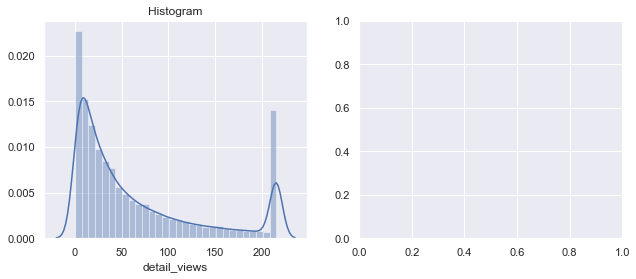

In [148]:
#==============================================================================
#==============================================================================

### Checking the distribution of detail_views variable

diagnostic_plots(master_data,'detail_views')


#==============================================================================
#==============================================================================

In [149]:
#==============================================================================
# Null Value
#==============================================================================

### Handling null values in target variable by taking meas as detail_views is a continuous variable.

mean_val = np.round(master_data['detail_views'].mean(),0)
master_data['detail_views'].fillna(mean_val, inplace=True)

# Checking null values
print(np.round(master_data['detail_views'].isnull().mean(), 3),  ' % missing values')

0.0  % missing values


In [150]:
#==============================================================================
# Create categorie bucket for detail_views
#==============================================================================

master_data['detail_views_bckt'] = pd.cut(x=master_data['detail_views'], bins=[-1, 50, 100, 150, 200, 250], labels=['0-50', '51-100', '101-150','151-200','>200'])
master_data['detail_views_bckt'] = master_data['detail_views_bckt'].astype(object)

In [151]:
### Checking unique values
master_data['detail_views_bckt'].unique()

array(['101-150', '>200', '0-50', '51-100', '151-200'], dtype=object)

In [152]:
#==============================================================================
# LabelEncoder: convert strings labels to numbers.
#==============================================================================

#Transforming Nominal Attributes
lbl_encde = LabelEncoder()
detail_views_bckt_lbl = lbl_encde.fit_transform(master_data["detail_views_bckt"])
master_data["detail_views_bckt_lbl"] = detail_views_bckt_lbl
master_data.head()

,product_tier,make_name,price,first_zip_digit,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int,detail_views_bckt,detail_views_bckt_lbl
0,Basic,Mitsubishi,16750,5,3091.0,123.0,2013,0.039793,31,101-150,1
1,Basic,Mercedes-benz,35950,4,3283.0,215.5,2015,0.067926,52,>200,4
2,Basic,Mercedes-benz,11950,3,3247.0,215.5,1998,0.081614,51,>200,4
3,Basic,Ford,1750,6,1856.0,26.0,2003,0.014009,101,0-50,0
4,Basic,Mercedes-benz,26500,3,490.0,20.0,2014,0.040816,11,0-50,0


In [153]:
#==============================================================================
# Balanced v/s Imbalanced Dataset
#==============================================================================

### Checking if the dataset is balanced or imbalanced

master_data.detail_views_bckt_lbl.value_counts()

0    46142
3    13821
4     8334
1     6409
2     3599
Name: detail_views_bckt_lbl, dtype: int64

In [154]:
#==============================================================================
# Categorical variables 
#==============================================================================

### Let's go ahead and analyse the categorical variables present in the dataset.

cat_vars = [var for var in master_data.columns if master_data[var].dtypes=='O' and var not in ['detail_views_bckt']]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  2


In [155]:
### let's visualise the values of the categorical variables
master_data[cat_vars].head()

,product_tier,make_name
0,Basic,Mitsubishi
1,Basic,Mercedes-benz
2,Basic,Mercedes-benz
3,Basic,Ford
4,Basic,Mercedes-benz


In [156]:
#==============================================================================
# Cardinality: Number of labels in a column
#==============================================================================

### Let's evaluate how many different categories are present in each of the variables.

for var in cat_vars:
    print(var, len(master_data[var].unique()), ' categories')

product_tier 3  categories
make_name 22  categories


Product tier categorical variables show low cardinality except make_name; this means that make_name has large number of different labels. We need to tackle high cardinality in the following steps.

In [157]:
#==============================================================================
# Rare labels
#==============================================================================

### Let's go ahead and investigate now if there are labels that are present only 
### in small proportion, i.e., below 1% of data

def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['detail_views_bckt'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(master_data, var, 0.007))
    print()

Series([], Name: detail_views_bckt, dtype: float64)

Series([], Name: detail_views_bckt, dtype: float64)



Around 70 labels in make_name are present in less than 1% of the data. **Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.**

We will remove rare lables here because high cardinal variables causes over-fitting.

In [158]:
### Finally, we want to explore the relationship between the categories of the different variables and product_tier

def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the loan purchasers
    df = df.copy()
    tmp = df.groupby(var)['detail_views_bckt'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(master_data, var, 0.007)
    master_data[var] = np.where(master_data[var].isin(frequent_ls), master_data[var], 'Rare')

In [159]:
#==============================================================================
# Separate dataset into train and test
#==============================================================================

### Before beginning to engineer our features, it is important to separate our 
### data intro training and testing set. This is to avoid over-fitting. This step 
### involves randomness, therefore, we need to set the seed.

### Let's separate into train and test set
### Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(master_data, master_data.detail_views_bckt_lbl,
                                                    test_size=0.3,
                                                    random_state=999,shuffle=True) # we are setting the seed here
X_train.shape, X_test.shape

((54813, 11), (23492, 11))

In [160]:
#==============================================================================
# Checking the outliners and fixing them in different variables
#==============================================================================

### Finding the boundaries of price variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'price', 1.5)
upper_boundary, lower_boundary

(38625.0, -13975.0)

In [161]:
### Capping the 'price' variable with boundary value

### lets look at the number and percentage of outliers for 'price'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 38625: {}'.format(
    len(X_train[X_train['price'] > upper_boundary])))
print()
print('% articles with price bigger than 38625: {}'.format(
    len(X_train[X_train['price'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 38625: 3212

% articles with price bigger than 38625: 0.05859923740718443


The upper boundary shows a value of ~38625. The lower boundary is negative, however the variable price does not take negative values. So to calculate the outliers for price we will only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 3212 articles, 5.8 % of the dataset, with extremely high values for price.

In [162]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['price']= np.where(X_train['price'] > upper_boundary, upper_boundary,
                       np.where(X_train['price'] < 0, 0,X_train['price']))

X_test['price']= np.where(X_test['price'] > upper_boundary, upper_boundary,
                       np.where(X_test['price'] < 0, 0,X_test['price']))

#==============================================================================
#==============================================================================

In [163]:
#==============================================================================
#==============================================================================

### Finding the boundaries of search_views variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'search_views', 1.5)
upper_boundary, lower_boundary

(4993.0, -2407.0)

In [164]:
### lets look at the number and percentage of outliers
### for 'search_views'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 4993: {}'.format(
    len(X_train[X_train['search_views'] > upper_boundary])))
print()
print('% articles with price bigger than 4993: {}'.format(
    len(X_train[X_train['search_views'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 4993: 5267

% articles with price bigger than 4993: 0.09609034353164396


The upper boundary shows a value of ~4993. The lower boundary is negative, however the variable search_views does not take negative values. So to calculate the outliers for search_views we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 5267 articles, 9.5 % of the dataset, with extremely high values for search_view.

In [165]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['search_views']= np.where(X_train['search_views'] > upper_boundary, upper_boundary,
                       np.where(X_train['search_views'] < 0, 0 ,X_train['search_views']))

X_test['search_views']= np.where(X_test['search_views'] > upper_boundary, upper_boundary,
                       np.where(X_test['search_views'] < 0, 0,X_test['search_views']))

#==============================================================================
#==============================================================================

In [166]:
#==============================================================================
#==============================================================================

### Finding the boundaries of first_registration_year_dt_yr variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'first_registration_year_dt_yr', 1.5)
upper_boundary, lower_boundary

(2025.5, 1997.5)

In [167]:
### lets look at the number and percentage of outliers
### for 'first_registration_year_dt_yr'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with first_registration_year bigger than 2020: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] > 2020])))
print()
print('% articles with first_registration_year bigger than 2020: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] > 2020])/len(X_train)))
print()
print('articles with first_registration_year lower than 1997: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] < 1997])))
print()
print('% articles with first_registration_year lower than 1997: {}'.format(
    len(X_train[X_train['first_registration_year_dt_yr'] < 1997])/len(X_train)))

total articles: 54813

articles with first_registration_year bigger than 2020: 0

% articles with first_registration_year bigger than 2020: 0.0

articles with first_registration_year lower than 1997: 871

% articles with first_registration_year lower than 1997: 0.015890390965646834


The upper boundary shows a value of ~2025. The lower boundary is 1997, however the variable first_registration_year_dt_yr does not take 2025 as an upper value. So to calculate the outliers for search_views we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of price's distribution.

We observe 871 articles below 1997, 1.5 % of the dataset, with extremely low values for first_registration_year_dt_yr.

In [168]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['first_registration_year_dt_yr']= np.where(X_train['first_registration_year_dt_yr'] > 2020, 2020,
                       np.where(X_train['first_registration_year_dt_yr'] < 1997, 1997 ,X_train['first_registration_year_dt_yr']))

X_test['first_registration_year_dt_yr']= np.where(X_test['first_registration_year_dt_yr'] > 2020, 2020,
                       np.where(X_test['first_registration_year_dt_yr'] < 1997, 1997 ,X_test['first_registration_year_dt_yr']))

#==============================================================================
#==============================================================================

In [169]:
#==============================================================================
#==============================================================================

### Finding the boundaries of ctr_calc variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'ctr_calc', 1.5)
upper_boundary, lower_boundary

(0.11031605576114606, -0.027479956037332796)

In [170]:
### lets look at the number and percentage of outliers
### for 'ctr_calc'

print('total articles: {}'.format(len(X_train)))
print()
print('articles with price bigger than 0.11031: {}'.format(
    len(X_train[X_train['ctr_calc'] > upper_boundary])))
print()
print('% articles with price bigger than 0.11031: {}'.format(
    len(X_train[X_train['ctr_calc'] > upper_boundary])/len(X_train)))

total articles: 54813

articles with price bigger than 0.11031: 2805

% articles with price bigger than 0.11031: 0.051173991571342566


In [171]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['ctr_calc']= np.where(X_train['ctr_calc'] > upper_boundary, upper_boundary,
                       np.where(X_train['ctr_calc'] < 0, 0,X_train['ctr_calc']))

X_test['ctr_calc']= np.where(X_test['ctr_calc'] > upper_boundary, upper_boundary,
                       np.where(X_test['ctr_calc'] < 0, 0,X_test['ctr_calc']))

#==============================================================================
#==============================================================================

In [172]:
#==============================================================================
#==============================================================================

### Finding the boundaries of stock_days_dt_int variable in the dataset

# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'stock_days_dt_int', 1.5)
upper_boundary, lower_boundary

(122.5, -57.5)

In [173]:
# lets look at the number and percentage of outliers
# for 'stock_days_dt_int'

print('total articles: {}'.format(len(X_train)))

print('articles with price bigger than 122: {}'.format(
    len(X_train[X_train['stock_days_dt_int'] > upper_boundary])))
print()
print('% articles with price bigger than 122: {}'.format(
    len(X_train[X_train['stock_days_dt_int'] > upper_boundary])/len(X_train)))

total articles: 54813
articles with price bigger than 122: 437

% articles with price bigger than 122: 0.007972561253717184


In [174]:
### Now let's replace the outliers by the maximum and minimum limit

X_train['stock_days_dt_int']= np.where(X_train['stock_days_dt_int'] > upper_boundary, 122,
                       np.where(X_train['stock_days_dt_int'] < 0, 0,X_train['stock_days_dt_int']))

X_test['stock_days_dt_int']= np.where(X_test['stock_days_dt_int'] > upper_boundary, 122,
                       np.where(X_test['stock_days_dt_int'] < 0, 0,X_test['stock_days_dt_int']))

#==============================================================================
#==============================================================================

In [175]:
#==============================================================================
# Missing values: Categorical Variables
#==============================================================================

### For categorical variables, we will fill missing information by adding an additional category: "missing"

# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in master_data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 6),  ' % missing values')

There are no missing values in categorical variable.

In [176]:
#==============================================================================
# Missing values: Numerical Variables
#==============================================================================

### For numerical variables, we are going to add an additional variable capturing 
### the missing information, and then replace the missing information in the original 
### variable by the mean (avg) or mode, or most frequent value:

# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in master_data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 6),  ' % missing values')

search_views 0.000146  % missing values
ctr_calc 0.000328  % missing values


Both of the variables are continuous in nature, for which we will take mean value. If a variable is discrete, then we will take mode value.

In [177]:
# list of numerical variables
num_vars = [var for var in master_data.columns if master_data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
master_data[num_vars].head()

Number of numerical variables:  8


,price,first_zip_digit,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int,detail_views_bckt_lbl
0,16750,5,3091.0,123.0,2013,0.039793,31,1
1,35950,4,3283.0,215.5,2015,0.067926,52,4
2,11950,3,3247.0,215.5,1998,0.081614,51,4
3,1750,6,1856.0,26.0,2003,0.014009,101,0
4,26500,3,490.0,20.0,2014,0.040816,11,0


In [178]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(master_data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

# let's visualise the discrete variables
master_data[discrete_vars].head()

Number of discrete variables:  2


,first_zip_digit,detail_views_bckt_lbl
0,5,1
1,4,4
2,3,4
3,6,0
4,3,0


In [179]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

# let's visualise the continuous variables
master_data[cont_vars].head()

Number of continuous variables:  6


,price,search_views,detail_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int
0,16750,3091.0,123.0,2013,0.039793,31
1,35950,3283.0,215.5,2015,0.067926,52
2,11950,3247.0,215.5,1998,0.081614,51
3,1750,1856.0,26.0,2003,0.014009,101
4,26500,490.0,20.0,2014,0.040816,11


In [180]:
### replace the missing values
for var in vars_with_na:
    
    if var in discrete_vars:
        # calculate the mode
        mode_val = X_train[var].mode()[0]
    
        # train
        X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
        X_train[var].fillna(mode_val, inplace=True)
    
        # test
        X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
        X_test[var].fillna(mode_val, inplace=True)
        
    else:
        # calculate the mean
        mean_val = np.round(X_train[var].mean(),3)
    
        # train
        X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
        X_train[var].fillna(mean_val, inplace=True)
    
        # test
        X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
        X_test[var].fillna(mean_val, inplace=True)

### check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

search_views    0
ctr_calc        0
dtype: int64

In [181]:
### check that test set does not contain null values in the engineered variables
tst_vars_with_na =[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

### print the variable name and the percentage of missing values
for var in tst_vars_with_na:
    print(var, np.round(X_test[var].isnull().mean(), 3),  ' % missing values')

In [182]:
#==============================================================================
# Categorical variables
#==============================================================================

### First, we will remove those categories within variables that are present in less than 1% of the observations:

# let's capture the categorical variables first
cat_vars = [var for var in master_data.columns if master_data[var].dtype == 'O']

In [183]:
### Creating function to identify frequent labels

def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the detail_views_bckt
    df = df.copy()
    tmp = df.groupby(var)['detail_views_bckt'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    print(find_frequent_labels(X_train, var, 0.007))
    print()
    print(find_frequent_labels(X_test, var, 0.007))
    print()

Index(['Basic', 'Plus', 'Premium'], dtype='object', name='product_tier')

Index(['Basic', 'Plus', 'Premium'], dtype='object', name='product_tier')

Index(['Audi', 'Bmw', 'Citroen', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Mazda',
       'Mercedes-benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Rare', 'Renault', 'Seat', 'Skoda', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'],
      dtype='object', name='make_name')

Index(['Audi', 'Bmw', 'Citroen', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Mazda',
       'Mercedes-benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Rare', 'Renault', 'Seat', 'Skoda', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'],
      dtype='object', name='make_name')

Index(['0-50', '101-150', '151-200', '51-100', '>200'], dtype='object', name='detail_views_bckt')

Index(['0-50', '101-150', '151-200', '51-100', '>200'], dtype='object', name='detail_views_bckt')



In [184]:
### Checking the labels of the categorical variables
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['detail_views_bckt'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(X_train, var, 0.007))
    print()
    print(analyse_rare_labels(X_test, var, 0.007))
    print()

Series([], Name: detail_views_bckt, dtype: float64)

Series([], Name: detail_views_bckt, dtype: float64)

Series([], Name: detail_views_bckt, dtype: float64)

Series([], Name: detail_views_bckt, dtype: float64)

Series([], Name: detail_views_bckt, dtype: float64)

Series([], Name: detail_views_bckt, dtype: float64)



In [185]:
#==============================================================================
# Zero values
#==============================================================================

### make a list of the variables that contain zero values
vars_with_zero = [var for var in master_data.columns if X_train[var].isin([0]).sum()>1 and var not in ['stock_days_dt_int','product_tier_lbl','detail_views_bckt_lbl']]

### print the variable name and the percentage of missing values
for var in vars_with_zero:
    print(var, np.round(master_data[var].isin([0]).mean(), 6),  ' % zero values')

search_views 0.000179  % zero values
detail_views 0.016065  % zero values
ctr_calc 0.015887  % zero values


All three labels can be zero logically, and their proportion is not high. Therefore, I am keeping these variables.

In [186]:
#==============================================================================
# LabelEncoder: convert strings labels to numbers.
#==============================================================================

#Transforming Nominal Attributes
product_tier_lbl = lbl_encde.fit_transform(X_train["product_tier"])
X_train["product_tier_lbl"] = product_tier_lbl
X_train["product_tier_lbl"].unique()

array([0, 2, 1])

In [187]:
#Transforming Nominal Attributes
product_tier_lbl = lbl_encde.fit_transform(X_test["product_tier"])
X_test["product_tier_lbl"] = product_tier_lbl
X_test["product_tier_lbl"].unique()

array([0, 1, 2])

In [188]:
#Transforming Nominal Attributes
make_name_lbl = lbl_encde.fit_transform(X_train["make_name"])
X_train["make_name_lbl"] = make_name_lbl
X_train["make_name_lbl"].unique()

array([ 7,  2, 17, 12, 13,  9, 14,  4,  1, 20, 15, 21,  5,  6,  8, 19, 10,
        0, 11,  3, 16, 18])

In [189]:
#Transforming Nominal Attributes
make_name_lbl = lbl_encde.fit_transform(X_test["make_name"])
X_test["make_name_lbl"] = make_name_lbl
X_test["make_name_lbl"].unique()

array([ 8,  0, 12, 10, 16, 14, 19, 13,  1, 20,  4, 21,  2,  9, 15, 17,  5,
        7, 18,  3, 11,  6])

In [190]:
### check absence of na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

In [191]:
### Generally checking the data info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54813 entries, 44049 to 78188
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_tier                   54813 non-null  object 
 1   make_name                      54813 non-null  object 
 2   price                          54813 non-null  float64
 3   first_zip_digit                54813 non-null  int64  
 4   search_views                   54813 non-null  float64
 5   detail_views                   54813 non-null  float64
 6   first_registration_year_dt_yr  54813 non-null  int64  
 7   ctr_calc                       54813 non-null  float64
 8   stock_days_dt_int              54813 non-null  int64  
 9   detail_views_bckt              54813 non-null  object 
 10  detail_views_bckt_lbl          54813 non-null  int32  
 11  search_views_na                54813 non-null  int32  
 12  ctr_calc_na                    54813 non-n

In [192]:
#### Drop unnecessary columns 
X_train = X_train.drop(['product_tier','make_name','detail_views','detail_views_bckt','detail_views_bckt_lbl','search_views_na','ctr_calc_na'], axis = 1)

X_test = X_test.drop(['product_tier','make_name','detail_views','detail_views_bckt','detail_views_bckt_lbl','search_views_na','ctr_calc_na'], axis = 1)

In [193]:
### Generally checking the data info after dropping columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54813 entries, 44049 to 78188
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          54813 non-null  float64
 1   first_zip_digit                54813 non-null  int64  
 2   search_views                   54813 non-null  float64
 3   first_registration_year_dt_yr  54813 non-null  int64  
 4   ctr_calc                       54813 non-null  float64
 5   stock_days_dt_int              54813 non-null  int64  
 6   product_tier_lbl               54813 non-null  int32  
 7   make_name_lbl                  54813 non-null  int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 3.3 MB


In [194]:
#==============================================================================
# Feature Scaling
#==============================================================================

### For use in  models, features need to be either scaled or normalised. 
### I will scale features between the min and max values:

train_vars = [var for var in X_train.columns if var in ['price', 'first_zip_digit','search_views','first_registration_year_dt_yr','ctr_calc','stock_days_dt_int']]
train_vars

['price',
 'first_zip_digit',
 'search_views',
 'first_registration_year_dt_yr',
 'ctr_calc',
 'stock_days_dt_int']

In [195]:
### fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

In [196]:
### Generally checking the data after Scaling
X_test.head()

,price,first_zip_digit,search_views,first_registration_year_dt_yr,ctr_calc,stock_days_dt_int,product_tier_lbl,make_name_lbl
9350,0.516492,0.750,0.134388,0.681818,0.472832,0.245902,0,8
40384,0.138463,0.125,0.596034,0.409091,0.548278,0.278689,0,0
18475,0.309367,0.000,0.247747,0.909091,0.109922,0.057377,0,12
77167,0.426833,0.125,0.082916,0.727273,0.240854,0.073770,0,10
78126,0.799995,0.750,0.093331,0.909091,0.175072,0.188525,0,8


In [197]:
### let's now save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

#### ==============================================================================
#### **Feature Selection:**
#### ==============================================================================

In the following cells, we will select a group of variables, the most predictive ones, to build our machine learning models.

In [198]:
### Calculating Information Value of the features for feature selection
final_iv, IV = data_vars(X_train,y_train)

In [199]:
### The detailed information for bucked is as follows:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,price,0.000000,0.283347,27504,32501,1.181683,-4997,-0.181683,0.527134,0.730235,-0.325911,0.180185
1,price,0.283425,1.000000,27309,29155,1.067597,-1846,-0.067597,0.472866,0.269765,0.561261,0.180185
2,first_zip_digit,0.000000,0.500000,34707,39764,1.145705,-5057,-0.145705,0.644933,0.739003,-0.136156,0.041763
3,first_zip_digit,0.625000,1.000000,20106,21892,1.088829,-1786,-0.088829,0.355067,0.260997,0.307798,0.041763
4,search_views,0.000000,0.033847,6097,28,0.004592,6069,0.995408,0.000454,-0.886892,NaN,5.667831
5,search_views,0.034048,0.064891,6093,181,0.029706,5912,0.970294,0.002936,-0.863949,NaN,5.667831
6,search_views,0.065091,0.102544,6086,860,0.141308,5226,0.858692,0.013948,-0.763700,NaN,5.667831
7,search_views,0.102744,0.153014,6090,2270,0.372742,3820,0.627258,0.036817,-0.558235,NaN,5.667831
8,search_views,0.153215,0.221110,6101,4697,0.769874,1404,0.230126,0.076181,-0.205173,NaN,5.667831
9,search_views,0.221310,0.324254,6083,8130,1.336512,-2047,-0.336512,0.131861,0.299138,-0.819159,5.667831


In [200]:
### Sorting and presenting the Information Value of the feature:
IV.sort_values('IV')

,VAR_NAME,IV
3,make_name_lbl,0.017452
2,first_zip_digit,0.041763
4,price,0.180185
1,first_registration_year_dt_yr,0.702589
5,product_tier_lbl,0.785903
0,ctr_calc,1.359903
7,stock_days_dt_int,2.765834
6,search_views,5.667831


The feature selection is done based on below points:
<ol>
<li> Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)</li>
<li> 0.02 to 0.1, then the predictor has only a weak relationship.</li>
<li> 0.1 to 0.3, then the predictor has a medium strength relationship.</li>
<li> 0.3 or higher, then the predictor has a strong relationship.</li>
</ol>

In [201]:
### Selecting the variables based on above rules:

slctd_feat_IV_WOE = IV[IV['IV'].between(0.02, 6, inclusive=False)]
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(slctd_feat_IV_WOE)))
print('The features and IV values are as follows:')
slctd_feat_IV_WOE['VAR_NAME']

#==============================================================================
#==============================================================================

### Saving the features in a list.
slctd_feat_list = []
for var in slctd_feat_IV_WOE['VAR_NAME']:
    slctd_feat_list.append(var)
    
print(slctd_feat_list)

total features: 8
selected features: 7
The features and IV values are as follows:
['ctr_calc', 'first_registration_year_dt_yr', 'first_zip_digit', 'price', 'product_tier_lbl', 'search_views', 'stock_days_dt_int']


#### ==============================================================================
#### **ML Model build:**
#### ==============================================================================

In the following cells, we will finally build our machine learning models, utilising the engineered data and the pre-selected features. 

In [202]:
#==============================================================================
# Import Required Packages
#==============================================================================

# to handle datasets
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix #Importing performance metrics- accuracy score and confusion_matrix


# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [203]:
### Comparing the features in the data set and the selected features

X_train.info()
print(slctd_feat_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54813 entries, 44049 to 78188
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          54813 non-null  float64
 1   first_zip_digit                54813 non-null  float64
 2   search_views                   54813 non-null  float64
 3   first_registration_year_dt_yr  54813 non-null  float64
 4   ctr_calc                       54813 non-null  float64
 5   stock_days_dt_int              54813 non-null  float64
 6   product_tier_lbl               54813 non-null  int32  
 7   make_name_lbl                  54813 non-null  int32  
dtypes: float64(6), int32(2)
memory usage: 3.3 MB
['ctr_calc', 'first_registration_year_dt_yr', 'first_zip_digit', 'price', 'product_tier_lbl', 'search_views', 'stock_days_dt_int']


In [204]:
### Removing the lest needed features

X_train_sltd_feat = X_train.drop(['make_name_lbl'], axis=1)
X_test_sltd_feat = X_test.drop(['make_name_lbl'], axis=1)

In [205]:
### Balancing the data-set

# Balancing DataSet by applying balancing techniques
#Installing imblearn library

!pip install imblearn

In [206]:
### Importing the function

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [207]:
### Modifying features with SMOTE

X_train_smote, y_train_smote = smote.fit_sample(X_train_sltd_feat,y_train)

In [208]:
### Checking if the variables are balanced or nor after applying SMOTE

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 32402, 3: 9609, 4: 5842, 1: 4459, 2: 2501})
After SMOTE : Counter({0: 32402, 3: 32402, 1: 32402, 4: 32402, 2: 32402})


In [209]:
#### Creating the model, fitting it with train data and obtaining the results

# Make an instance of the model
logistic = LogisticRegression()

# Fitting the value for x and y
logistic.fit(X_train_smote, y_train_smote)

# Prediction from test data
prediction = logistic.predict(X_test_sltd_feat)

In [210]:
### Checking the results from the model

### Calculating the accuracy score
accuracy_score = accuracy_score(y_test,prediction)

print("The accuracy of the model is: \n")
print(accuracy_score)

The accuracy of the model is: 

0.8293887280776434


In [211]:
### Confusion Matrix

confusion_matrix = confusion_matrix(y_test,prediction)

print("The confusion matrix of the model is: \n")
print(confusion_matrix)

The confusion matrix of the model is: 

[[12422   101     0  1217     0]
 [    0  1105   467   356    22]
 [    0   214   739     0   145]
 [  329   646    89  3148     0]
 [    0    20   402     0  2070]]


In [212]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_test != prediction).sum())

Misclassified samples: 4008


In [213]:
print("Classification Report:")
print(classification_report(y_test, prediction))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     13740
           1       0.53      0.57      0.55      1950
           2       0.44      0.67      0.53      1098
           3       0.67      0.75      0.70      4212
           4       0.93      0.83      0.88      2492

    accuracy                           0.83     23492
   macro avg       0.71      0.74      0.72     23492
weighted avg       0.85      0.83      0.84     23492

 
 


The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li> Bucket: '0-50', '>200' showed the best recall of nearly 90%, i.e., the actual was predicted correctly. It can be attributed to the high no. of observations </li>
<li> Remaining Bucket showed an average recall rate of 66%. I can see that the buckets which had more samples performed better than the buckets with less sample. This is to be noted because the training data was upsampled using SMOTE to remove any bias. </li>
</ol>

**Precision:**
<ol>
<li> Bukcets leaving '0-50', '>200', showed near average precission of 55%, i.e., the precision of prediction was taken down by these buckets. Similary as above, the training set was balanced before training the model, and imbalance bias should not have occured. </li>

**Note:** Thoughts on algorithm, data and further improvements are given at bottom after Q2 in **'Conclusion'** Cell. 

### Conclusion:

<ol>
<li> We can see the the same algorithm Multiclass Logistic Regression performed relatively well with second case of classify the buckets of detail view as compared with the case of classifying product tier. The reason could be understood from the assumption of logistic regression that the dependent variable should be ordinal, i.e., there should be clear ordering of the categories in detail views buckets which is 0-50 smaller than 50-100 whereas from product tier, the algo could not find a relation.  </li>
<li> Other assumption of Multiclass Logistic Regression is that the independent variables should be independent of each other, but in both the case we had correlated variables like 'search_view', 'detail_view' and 'ctr'. </li>
<li> The data has high number of outliners which is a point of worry because if we remove these outliners then we will lose more than 20% of the data, but if we capp those outliners with upper and lower boundary values, then it will distort the distribution of the data. </li>
<li> It can be seen that the precision and recall for data with buckets of equal preportion is better in prediction that the date with unequal and less number of samples for some buckets. </li>
</ol>

**Further Improvement:**

The steps to improve the results are as follows:
<ol>
<li> Implement the same data to other robust algorithms like Neural Networks to know if the issue is with data modelling or algorithm used. </li>
<li> Capping of outliners by replacing them with Upward Boundary value and Lowest Boundary Value should be checked,i.e. we should consider capping these outliners with arbitary values. </li>

#### Bonus:

In [214]:
#==============================================================================
# Checking the above data on Random Forest Classifier with basic estimator
#==============================================================================
# from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train_smote, y_train_smote)
print("The model score with RFC is: \n")
model.score(X_test_sltd_feat, y_test)


The model score with RFC is: 



0.9536012259492593

In [215]:
### Prediction on test data

y_predicted = model.predict(X_test_sltd_feat)

In [216]:
### Creating the confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13594,     2,     0,   143,     1],
       [    1,  1716,   119,    70,    44],
       [    0,    96,   840,    12,   150],
       [   78,   154,     6,  3967,     7],
       [    0,    48,   155,     4,  2285]], dtype=int64)

In [247]:
### Printing the misclassified values from prediction

print('Misclassified samples: %d' % (y_test != y_predicted).sum())

Misclassified samples: 1090


In [218]:
### Print the classification report

print("Classification Report:")
print(classification_report(y_test, y_predicted))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13740
           1       0.85      0.88      0.87      1950
           2       0.75      0.77      0.76      1098
           3       0.95      0.94      0.94      4212
           4       0.92      0.92      0.92      2492

    accuracy                           0.95     23492
   macro avg       0.89      0.90      0.90     23492
weighted avg       0.95      0.95      0.95     23492

 
 


In [219]:
#==============================================================================
# Checking the above data on Random Forest Classifier with RandomizedSearchCV
#==============================================================================

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)

rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10, 25, 50, 100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation (here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train_smote, y_train_smote)

In [220]:
### Check the parameters

rf_parameters
#rf_ht_score

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [223]:
### Fitting the model with above selected parameters

classifier=RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_features = 2, 
                                 min_samples_leaf = 1, n_estimators = 500)

In [224]:
### fitting the features

classifier.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=2,
                       n_estimators=500)

In [225]:
### Predicting the Test set results

y_pred = classifier.predict(X_test_sltd_feat)

In [226]:
### Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[13630     1     0   108     1]
 [    1  1726    95    74    54]
 [    1    75   855     8   159]
 [   66   121     2  4014     9]
 [    1    50   147     4  2290]]


In [227]:
### Calculating the accuracy

accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

0.9584113740847948


In [228]:
### Print the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13740
           1       0.87      0.89      0.88      1950
           2       0.78      0.78      0.78      1098
           3       0.95      0.95      0.95      4212
           4       0.91      0.92      0.92      2492

    accuracy                           0.96     23492
   macro avg       0.90      0.91      0.90     23492
weighted avg       0.96      0.96      0.96     23492

 
 


The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li> All the buckets showed improvement in the recall as compared with Logistic Regression and Random Forest with basic estimator. </li>
</ol>

**Precision:**
<ol>
<li> All the buckets showed improvement in the precision as compared with Logistic Regression and Random Forest with basic estimator. </li>
</ol>
    
**Understading:**
<ol>
<li> The buckets with equal proportion are good for classification that the buckets with unequal proportion. </li>
</ol>

In [229]:
#==============================================================================
# Checking the above data on XGBoost Classifier with RandomizedSearchCV
#==============================================================================

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [230]:
### Preparing XGB Boost classifier

classifier=xgboost.XGBClassifier(objective='multi:softprob')

In [231]:
### Fiting XGB classifier to find best estimator using RandomizedSearchCV

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=40,n_jobs=-1,cv=9,verbose=3)

In [232]:
### fittig the data with training data

random_search.fit(X_train_smote,y_train_smote)

Fitting 9 folds for each of 40 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 133.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 181.8min finished


RandomizedSearchCV(cv=9, estimator=XGBClassifier(objective='multi:softprob'),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [233]:
### Getting the best estimator

random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=12,
              objective='multi:softprob')

In [234]:
### Getting the best perimeters

random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [235]:
### Fitting the XGB classifier with the parameters found

classifier=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=12,
              min_child_weight=1, objective='multi:softprob')

In [236]:
### Get the model score

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train_smote,y_train_smote,cv=10)

In [239]:
### Get the mean score

score.mean()

0.981680143201037

In [240]:
### fitting the classifier with training data 

classifier.fit(X_train_smote,y_train_smote)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=12,
              objective='multi:softprob')

In [241]:
### Predicting the Test set results

y_pred = classifier.predict(X_test_sltd_feat)

In [242]:
### Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[13687     1     0    52     0]
 [    1  1741    87    60    61]
 [    1    60   872     7   158]
 [   66    84     3  4049    10]
 [    0    38   146     6  2302]]


In [243]:
### Calculating the accuracy

accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

0.9642005789204836


In [244]:
### print the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13740
           1       0.90      0.89      0.90      1950
           2       0.79      0.79      0.79      1098
           3       0.97      0.96      0.97      4212
           4       0.91      0.92      0.92      2492

    accuracy                           0.96     23492
   macro avg       0.91      0.91      0.91     23492
weighted avg       0.96      0.96      0.96     23492

 
 


Text(66.5, 0.5, 'Truth')

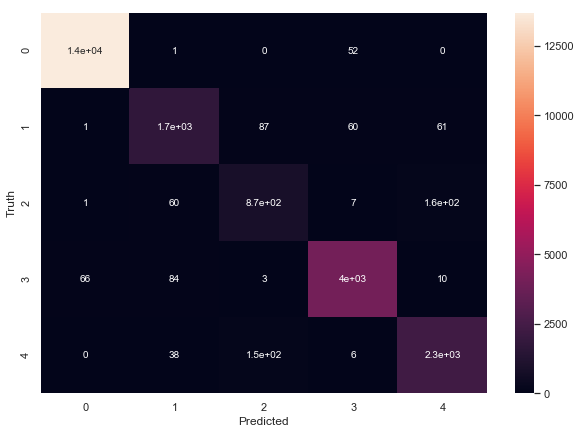

In [249]:
# Creating Heat Map for confusion Matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The observations from the Classifcation Report are as follows:

**Recall:**
<ol>
<li> The recall for bucket '0-50' has achieved perfection with all the predictions have been correctly predicted. </li>
<li> The recall for bucket '100-150' which has least number of values showed a precision of above average nearly 80%. </li>
<li> The recall for bucket '150-200' for which the values were not high as compared with '0-50' bucket, but it showed a precision of about 96%. </li>
</ol>

**Precision:**
<ol>
<li> The precision for bucket '0-50' has achieved perfection with all the values have been identified perfectly. </li>
<li> The precision for bucket '100-150' which has least number of values showed a precision of above average nearly 80%. i.e. 80% of the values are predicted perfectely. </li>
<li> The precision for bucket '150-200' for which the values were not high as compared with '0-50' bucket, but it showed a precision of about 97%. </li>
</ol>
    
**Understading:**
<ol>
<li> The buckets with equal proportion are good for classification then the buckets with unequal proportion of values. </li>
<li> XGB classifier with hyper-parameter optimised parameters can enhance the classification results on correctly feature engineered data.
</ol>

In [424]:
#==============================================================================
# Effect of K value on classifier
#==============================================================================

# Misclassified_sample = []
# # Calculating error for K values between 1 and 20
# for i in range(1,20):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_smote, y_train_smote)
#     pred_i = knn.predict(X_test_sltd_feat)
#     Misclassified_sample.append((y_test != pred_i).sum())
    
# print(Misclassified_sample)

[3472, 3510, 3548, 3478, 3644, 3525, 3651, 3593, 3708, 3639, 3728, 3685, 3772, 3704, 3791, 3704, 3828, 3770, 3839]


I was checking K-means classifier with different neighbour values, but the prediction rate has been same as Logistic Regression.

In [742]:
#==============================================================================
# Checking the above data on Random Forest Classifier
#==============================================================================

# from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train_smote, y_train_smote)
print("The model score with RFC is: \n")
model.score(X_test_sltd_feat, y_test)

The model score with RFC is: 



0.9229950621488167

The model score for **product_tier** target is **0.9229950621488167**

The model score for **detail_view** target is **0.9474714796526477**

In [743]:
# Prediction on test data

y_predicted = model.predict(X_test_sltd_feat)

In [744]:
# Creating the confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21426,   361,   885],
       [  118,    11,    28],
       [  381,    36,   246]], dtype=int64)

Text(66.5, 0.5, 'Truth')

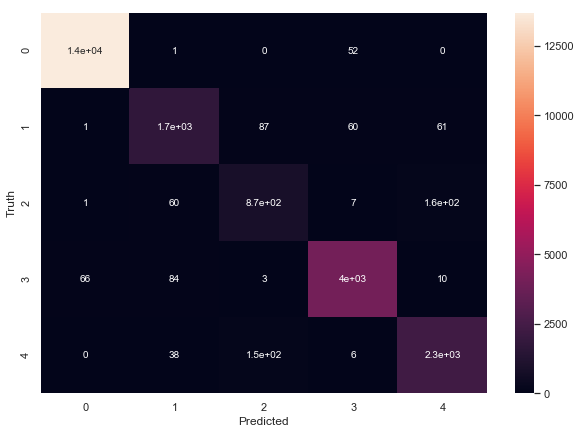

In [248]:
# Creating Heat Map for confusion Matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### ==============================================================================
#### **End of Script:**
#### ==============================================================================